## How to create the best Regression model using 9 different ML Models 

Nowadays creating Machine Learning models are very easy because of so many good Python Machine Libraries that are available but the most important part where most of us struggle is to create an efficient, optmised and Best Machine Learning Model possible.

So, for this scenario only I have created this project, we will try to create the best Regression Model here using different Machine Learning Models and methods like Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, using Regularization methods like Lasso, Ridge, Elastic net, Ensemble Methods like HistGradientBoostingRegressor, RandomForestRegresor and also using a Neural Network.  

To create a Best ML Model on any dataset the most important thing that we should do is to treat the data very intensively such that the final data is the only data with which we want to train our model such that no unneccessary data points, patterns or columns are present in the Dataset.

## Index of the Content

1. Data Exploration
   
2. Handling Null Values

3. Feature Engineering and Feature Selection

4. Handling Categorical Values 

5. Handling Outliers

6. Preprocessing - Removing Duplicates, Multi- Collinearity etc.

7. Training Different Models and try to determine the best Regression Model for this dataset

    -  Simple Linear Regression model

    - Multiple Linear Regression

    - Polynomial Regression

    - Using Regularization

    - Using Ensemble Models

    - Using Neural Network



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Increasing the Maximum of rows that can be dislayed at once to 100 and columns to all

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
car3 =pd.read_csv('Car details v3.csv')

In [5]:
car3.shape

(8128, 13)

## Data Exploration

In Data Exploration step there are lots of things that we can check and explore but some of the most important ones are - 

- To analyze each column and understand how each of them can be used most efficiently

- To check number of numerical and categorical columns in the dataset

- To check correlation between Predictors and the Target column

- To check for Null values

- To check for Outliers

- What type of pre-processing, feature engineering will be required to get the best of the dataset

Analyzing the Columns of the Dataset

In [6]:
car3.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0



  - There are both kinds of columns in the dataset numerical as well as categorical columns

  - There are columns like mileage, engine, max_power and torque from which numerical values can be extracted in the Separate Columns

Writing functions for plotting scatterplot and Boxplot in one go for all the required columns.
 - It is always better to write functions for the steps that we may have to repeat several times.


In [7]:
#For Numerical Columns
def scatterplot(Num_cols, Output, df):
    for col in Num_cols:
      plt.figure()
      sns.scatterplot(x = col, y = Output, data = df)

In [8]:
#For Categorical Columns
def boxplot(cat_cols, Output, df):
    for col in cat_cols.columns:
        plt.figure()
        sns.boxplot(x = col, y=Output, data = df)
    

Getting all the numerical columns to plot scatterplots with the Target Variable

In [9]:
num_cols3 = car3.select_dtypes(include = 'number')

In [10]:
num_cols3

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0
...,...,...,...,...
8123,2013,320000,110000,5.0
8124,2007,135000,119000,5.0
8125,2009,382000,120000,5.0
8126,2013,290000,25000,5.0


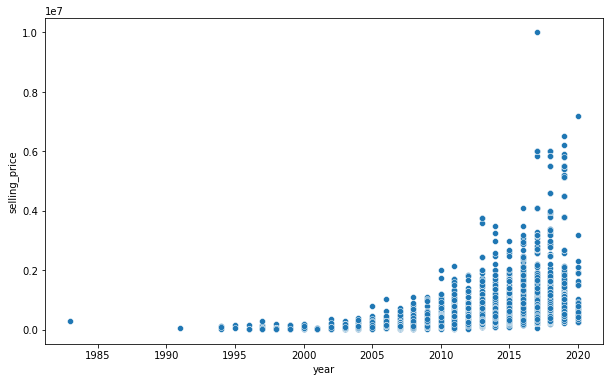

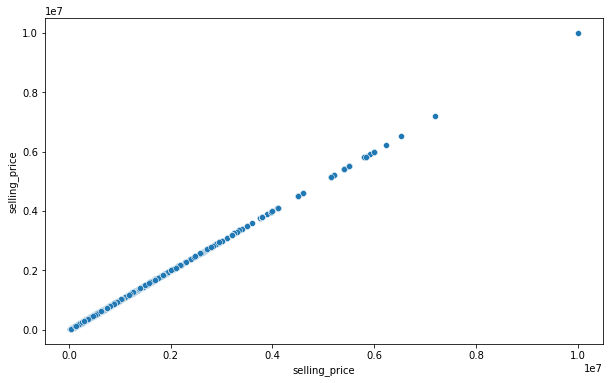

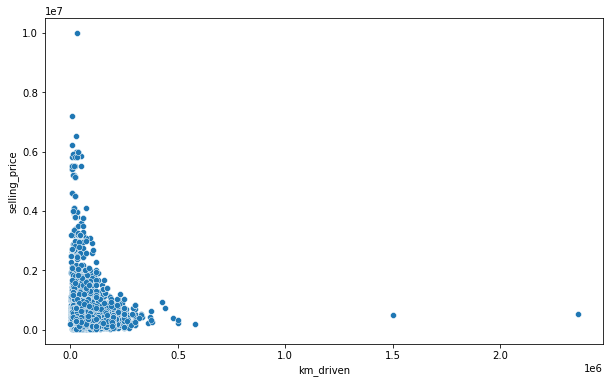

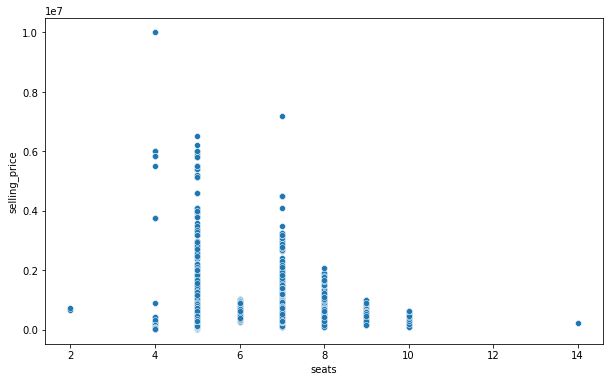

In [11]:
scatterplot(num_cols3, 'selling_price', car3)

- We can observe above in the scatterplots that no numerical column has some solid correlation with the Target column only column 'year' seems to have some kind of positive relation which we will check later.


Getting all the categorical columns from the dataset for plotting Boxplots.

In [12]:
cat_cols3 = car3.select_dtypes(include = 'object')

In [13]:
cat_cols3

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


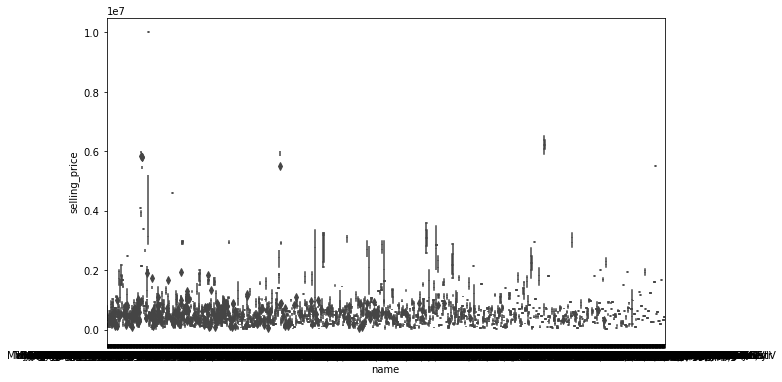

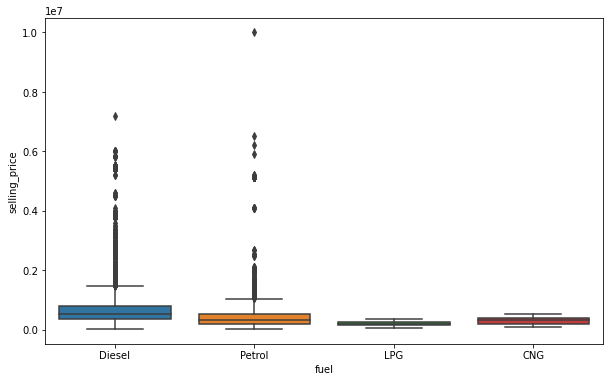

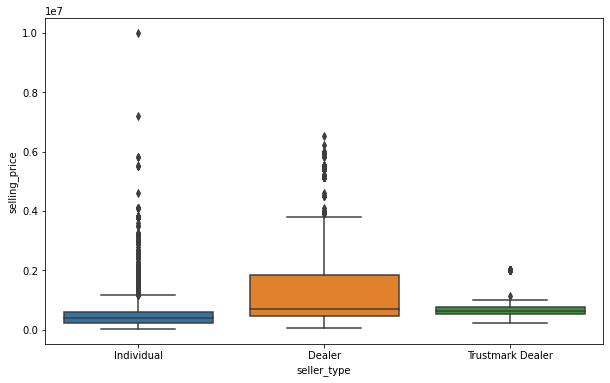

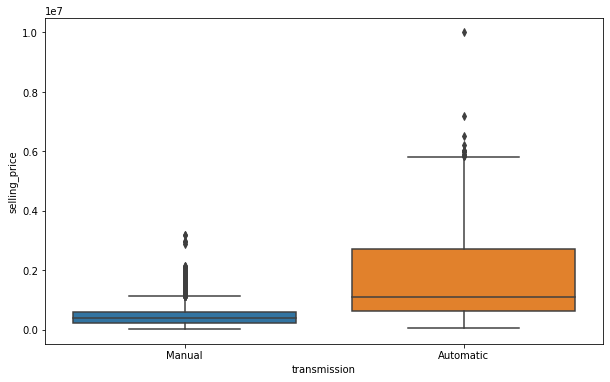

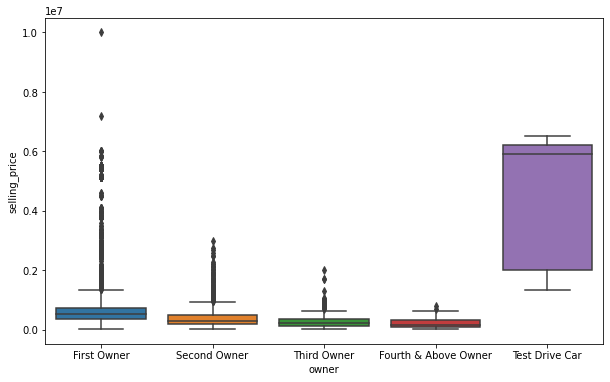

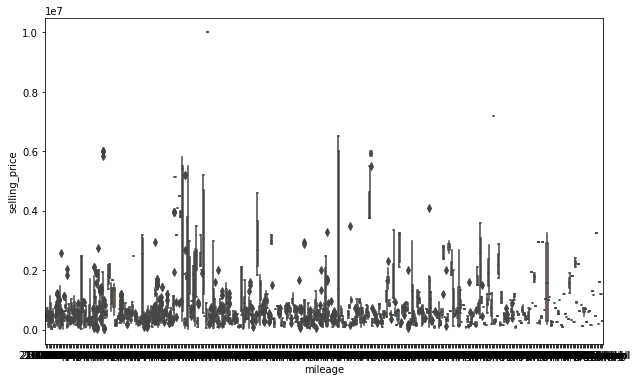

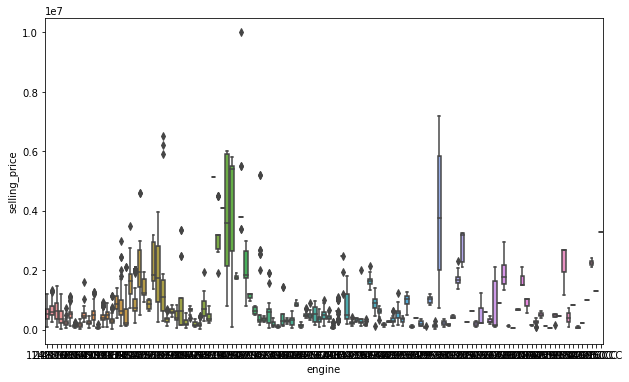

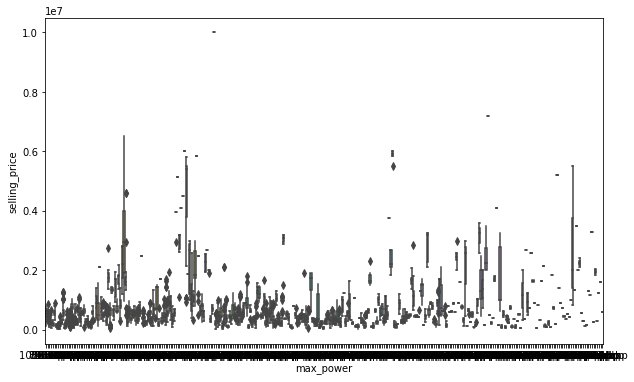

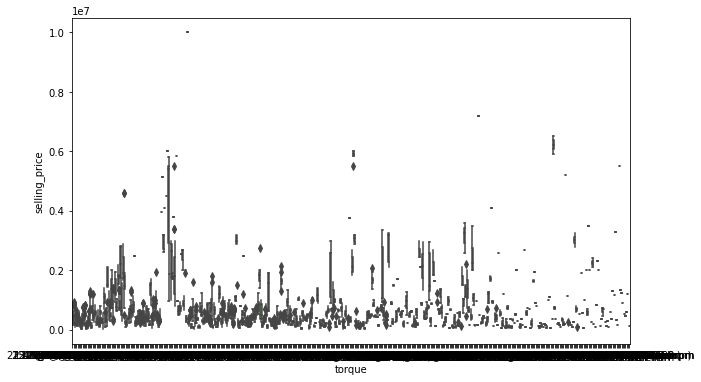

In [14]:
boxplot(cat_cols3, 'selling_price', car3)


- We can see above that for some  categorical columns like fuel, seller_type etc. which have less number of unique elements have some correlation with the target variable but for the columns which have large number of unique elements like name, mileage etc. we can't determine if they have any correlation or not because so many box plots are merged together

- So for categorical columns which have large number of unique elements, we will have to do some feature engineering to extract usable data from these categorical columns in separate columns. For ex - from column 'name' we can extract the 'Brand_Name' of the car which will definitely have some correlation with the Target Column


Checking the Distribution of Target variable.

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

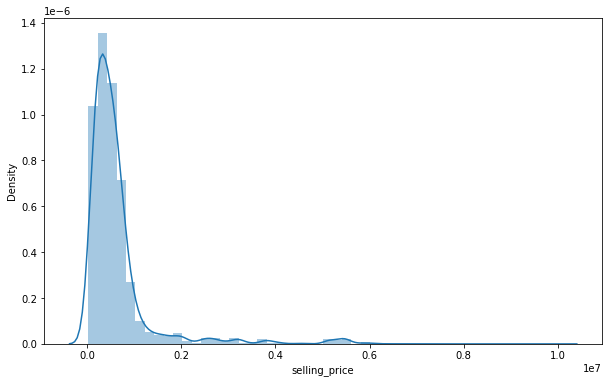

In [15]:
sns.distplot(car3['selling_price'])

- The target column 'selling_price' is rightly Skewed.

In [16]:
car3['selling_price'].nunique()

677


Checking the number of missing values that are present in the Dataset

In [17]:
car3.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

- We can see above that the columns mileage, engine, max_power, torque and seats have around 221 null values each.

Printing all the rows where column "mileage" has a missing value

In [18]:
car3[car3['mileage'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


- We can observe above that null values in all the 5 columns are appearing together so in total also we have to handle 222 rows only not more than that because all null values are together in all the 5 columns

In [19]:
car3.shape

(8128, 13)

Checking Outliers in the Target Variable

<AxesSubplot:xlabel='selling_price'>

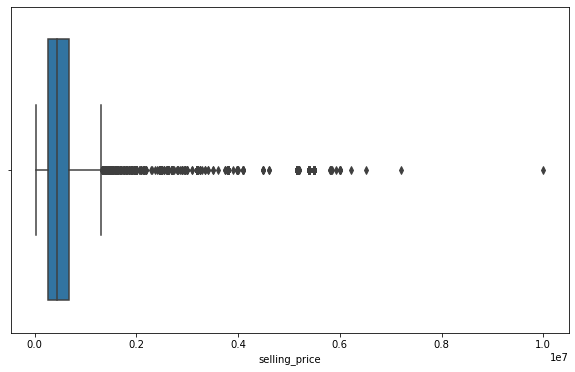

In [20]:
sns.boxplot(x = car3['selling_price'])

In [21]:
car3[['selling_price']].head(50)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


In [22]:
car3.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


## Summary

After Analyzing all the columns in the dataset, scatterplots, boxplots and Null Values we can say that - 

- We will have to handle Null values

- We will have to extract numerical parts from columns like mileage, engine, name, max_power, Torque into separate columns - Feature Engineering

- Currently no numerical column has a strong correlation with the Target Column, we will have to check again for the correlation after performing the feature Engineering

- We will have to handle the Categorical columns

- We will have to handle Outliers

## Handling Null Values

There are multiple ways to handle Missing values, some of the most common methods are:-

  - Replacing them with the most common value in that Column

  - Dropping the entire row if it contain null values

  - Replacing them with the most common value in a group etc.



  

But before moving forward with the usual methods, first we should analyze the dataset and determine why data points are not present in a particular column or in a particular row, there can be many reasons like - 

  - Data point does not exist for that particular column or row - 
  In that case in case of numerical column the missing values should be replaced with 0 and in case of categorical Column with "Not Available" or something similar.

  - Data point is missing at a row but for the same thing data is present at another row - 
  Here also for few of the rows which have null values, the same car has some non null values present at some another row with which we can replace the Null Values.


 
So, whenever we are handling the Null Values it is important to understand the dataset that why there are null values present and if we can determine the correct replacements for them using the existing non null data in the Dataset then it is the best way otherwise we can use usual methods to handle Null Values.

In [23]:
car3.shape[0]

8128

In [24]:
car3.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

- We can see the number of null values present in each column of the dataset above.

Getting all the Car names which have null values in their columns

In [25]:
car3[car3['mileage'].isnull()][['name']].value_counts().sort_values(ascending = False)

name                                      
Maruti Swift VDI BSIV                         23
Maruti Swift 1.3 VXi                          14
Toyota Etios GD                               10
Maruti Omni E 8 Str STD                        9
Maruti Swift VDI BSIV W ABS                    7
Hyundai Santro Xing XG                         6
Toyota Etios Liva GD                           6
Hyundai Santro GLS I - Euro II                 5
Tata Indica DLS                                5
Hyundai Santro Xing XL                         5
Maruti Estilo LXI                              5
Tata Indica Vista Aqua 1.3 Quadrajet (ABS)     5
Maruti Swift 1.3 LXI                           4
Toyota Etios Liva GD SP                        3
Toyota Etios Liva G                            3
Ford Fiesta 1.6 SXI ABS Duratec                3
Toyota Etios V                                 3
Hyundai Santro GLS I - Euro I                  3
Maruti Omni LPG STD BSIV                       3
Ford Figo Aspire Facelift 

We can see below that the car name 'Maruti Swift VDI BSIV' taken from the above list of car names having null values has some non-null values too 

- As we can see below there are 36 non null values present for this car name with which we can replace the null values.

- Similarly, for some other car names too there exist some non null values with which we can replace null values.

In [26]:
car3[car3['name'] == 'Maruti Swift VDI BSIV']['mileage'].notnull().sum()

36

Storing the index of all those rows in which column 'mileage' has a null value

In [27]:
Names = car3[car3['mileage'].isnull()]['name'].value_counts().index

To get the non-null values for the Car Names having null values for all the 5 columns.

In [28]:
Mileage_rep = []
engine_rep = []
power_rep = []
torque_rep = []
seats_rep = []
for i in Names:
    if car3[car3['name']==i]['mileage'].notnull().sum() > 0:
        Mileage_rep.append({i:car3[car3['name']==i]['mileage'].value_counts().index[0]})
    
    if  car3[car3['name']==i]['engine'].notnull().sum() > 0:
        engine_rep.append({i:car3[car3['name']==i]['engine'].value_counts().index[0]})
        
        
    if  car3[car3['name']==i]['max_power'].notnull().sum() > 0:
        power_rep.append({i:car3[car3['name']==i]['max_power'].value_counts().index[0]})  
        
    if  car3[car3['name']==i]['torque'].notnull().sum() > 0:
        torque_rep.append({i:car3[car3['name']==i]['torque'].value_counts().index[0]}) 
        
    if  car3[car3['name']==i]['seats'].notnull().sum() > 0:
        seats_rep.append({i:car3[car3['name']==i]['seats'].value_counts().index[0]}) 

So, we got dictionaries for all the 5 column having car names with their non-null values as we can see for the column 'mileage' below

In [29]:
Mileage_rep

[{'Maruti Swift VDI BSIV': '25.2 kmpl'},
 {'Toyota Etios GD': '23.59 kmpl'},
 {'Maruti Omni E 8 Str STD': '16.8 kmpl'},
 {'Toyota Etios Liva GD': '23.59 kmpl'},
 {'Toyota Etios Liva GD SP': '23.59 kmpl'},
 {'Toyota Etios Liva G': '17.71 kmpl'},
 {'Tata Indica Vista Quadrajet LS': '22.3 kmpl'},
 {'Maruti Alto K10 LXI': '20.92 kmpl'},
 {'Maruti Swift Dzire VDI Optional': '26.59 kmpl'},
 {'Toyota Etios VD': '23.59 kmpl'}]


Replacing the missing value using map method and dictionary created in the previous step

In [30]:
for dmap in Mileage_rep:
    car3['mileage'] = car3['mileage'].fillna(car3['name'].map(dmap))

Writing a function for the above steps so that we don't have to write it again for each column

In [31]:
def map_rep(Rep, col):
    for dmap in Rep:
        car3[col] = car3[col].fillna(car3['name'].map(dmap))

In [32]:
map_rep(engine_rep, 'engine')

In [33]:
map_rep(power_rep, 'max_power')

In [34]:
map_rep(torque_rep, 'torque')

In [35]:
map_rep(seats_rep, 'seats')

Now we have replaced some of the null values but still we have around 160 null values in the 5 columns which we can drop from the dataset by dropping those 160 rows

In [36]:
car3.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          160
engine           160
max_power        160
torque           161
seats            160
dtype: int64

There is one extra null value in the column torque, so just checking that below

In [37]:
car3[(car3['torque'].isnull()) & (car3['mileage'].notnull())]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,NaN,8.0


There is only one row as we can see below for the car name we got above

In [38]:
car3[(car3['name'].str.contains('Maruti Omni CNG'))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,NaN,8.0


We can delete this row as columns 'max_power', 'torque', 'seats' don't have correct values

In [39]:
car3.drop(4933, axis = 0, inplace = True)

The row has been deleted as we can see below

In [40]:

car3[(car3['name'].str.contains('Maruti Omni CNG'))]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


In [41]:
car3.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          160
engine           160
max_power        160
torque           160
seats            160
dtype: int64

In [42]:
car3[car3['mileage'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


Now, we have only 160 null values which we can drop as we will be left with enough data after that too and because we can't find any relation of the null values with the existing non-null data

In [43]:
car3.dropna(inplace = True)

In [44]:
car3.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## Summary

- All of the null values have been handled now

- 60 of them were replaced with the non-null data of the same Car name present in the dataset

- 160 of them were dropped from the dataset

## Extracting required information into separate Columns  - Feature Engineering

We need to look at each column one by one and see if multiple parts of information is comprised in one column and how we can separate those multiple parts of information in separate columns.

Here also we see columns like 'name', 'engine', 'max_power', 'mileage' which contains part of information which can be extracted to separate columns for further training, so - 


  -  From column 'name', we found out that there are 2058 unique car names which don't give us much information about the 'selling_price' but if we can extract the Brand Names of the Car Name separately then it will definitely have some strong correlation with the Target column i.e 'selling_price'

  - From Column 'mileage' we can extract the numerical value after removing the unit 'Kmpl' which will be more useful to us than keeping the whole value and working with that

  - From Column 'engine', same thing can be done, extracting the numerical part from each value

  - For 'max_power' and 'torque' also we can extract the numerical parts in separate columns

In [45]:
car3['name'].nunique()

1982

Examining the columns once again

In [46]:
car3.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


Analyzing the Column 'name' for extracting the Brand Name/Company Name from each row in a separate Column

In [47]:
car3[['name']]

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII
...,...
8123,Hyundai i20 Magna
8124,Hyundai Verna CRDi SX
8125,Maruti Swift Dzire ZDi
8126,Tata Indigo CR4


Using Regular Expression we can extract the required data from columns

In [48]:
import re

As we can see below we are able to sucessfully extract the Brand Name from the Car name using regular expression

In [49]:

re.findall(r'([a-zA-z]+)',car3['name'][0])[0]

'Maruti'

After dropping some rows we need to reset the index, so that they become continous

In [50]:
car3.reset_index(inplace = True)

In [51]:
car3

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7963,8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7964,8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7965,8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Checking the last index in the column, we are able to fetch the Brand Name correctly here also

In [52]:
re.findall(r'([a-zA-Z]+)', car3['name'][7966])[0]

'Tata'

Extracting the Brand Names from each value in the column 'name'

In [53]:
Brand_Name = []
for i in range(car3.shape[0]):
    Brand_Name.append(re.findall(r'([a-zA-Z]+)',car3['name'][i])[0])

So we successfully extracted the Brand Names from each car name in the column 'name' as we can see below

In [54]:
Brand_Name

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Toyota',
 'Ford',
 'Renault',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Tata',
 'Maruti',
 'Jeep',
 'Honda',
 'Honda',
 'Maruti',
 'Maruti',
 'Maruti',
 'Toyota',
 'Toyota',
 'Mercedes',
 'Honda',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Honda',
 'Toyota',
 'Toyota',
 'Audi',
 'Toyota',
 'Audi',
 'Mercedes',
 'Tata',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Ford',
 'Maruti',
 'Volkswagen',
 'Honda',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Toyota',
 'Ford',
 'BMW',
 'Maruti',
 'Datsun',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Volkswagen',
 'Hyundai',
 'Volksw

Adding this new Brand Name column in the dataset

In [55]:
car3['Brand_Name'] = Brand_Name

Checking the Brand Names and the number of times they have occurred in the Column

In [56]:
car3['Brand_Name'].value_counts()

Maruti        2403
Hyundai       1360
Mahindra       758
Tata           721
Toyota         475
Honda          466
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
BMW            118
Skoda          104
Nissan          81
Jaguar          71
Volvo           67
Datsun          65
Mercedes        54
Fiat            41
Audi            40
Lexus           34
Jeep            31
Mitsubishi      14
Force            6
Land             6
Isuzu            5
Kia              4
Ambassador       4
Daewoo           3
MG               3
Ashok            1
Opel             1
Name: Brand_Name, dtype: int64

We can see the column Brand_name is added at the last 

In [57]:
car3.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand_Name
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


We can clearly see a pattern here, brand like 'BMW', 'Lexus' has higher average price, so we can use 
this column at the time of training

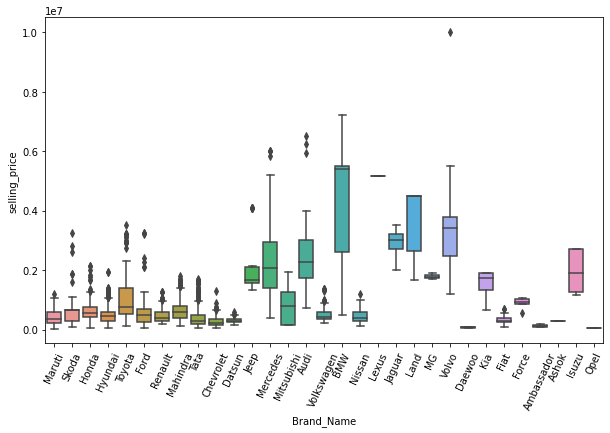

In [58]:

sns.boxplot( x ='Brand_Name', y = 'selling_price', data = car3)
a = plt.xticks(rotation =65)

Let's extract the numerical value from the college 'mileage'

In [59]:
car3['mileage'].value_counts()

18.9 kmpl     225
19.7 kmpl     173
18.6 kmpl     164
21.1 kmpl     157
17.0 kmpl     133
             ... 
19.69 kmpl      1
17.8 km/kg      1
10.9 kmpl       1
13.38 kmpl      1
16.51 kmpl      1
Name: mileage, Length: 393, dtype: int64

In [60]:
Mileage = []
for i in range(car3.shape[0]):
    Mileage.append(re.findall(r'[0-9\.]+', car3['mileage'][i])[0])

In [61]:
Mileage

['23.4',
 '21.14',
 '17.7',
 '23.0',
 '16.1',
 '20.14',
 '17.3',
 '16.1',
 '23.59',
 '20.0',
 '19.01',
 '17.3',
 '19.3',
 '18.9',
 '18.15',
 '24.52',
 '23.0',
 '19.7',
 '22.54',
 '21.0',
 '25.5',
 '26.59',
 '21.5',
 '20.3',
 '21.4',
 '24.7',
 '18.2',
 '18.9',
 '16.8',
 '24.3',
 '14.0',
 '18.6',
 '24.3',
 '33.44',
 '23.95',
 '17.0',
 '20.63',
 '13.93',
 '16.1',
 '16.0',
 '17.8',
 '16.8',
 '18.5',
 '24.3',
 '23.95',
 '12.55',
 '12.99',
 '14.8',
 '24.7',
 '13.5',
 '26.0',
 '20.65',
 '27.3',
 '11.36',
 '12.99',
 '17.68',
 '14.28',
 '18.53',
 '14.84',
 '21.12',
 '20.36',
 '21.27',
 '26.59',
 '18.16',
 '21.4',
 '22.0',
 '25.1',
 '20.51',
 '21.66',
 '24.3',
 '24.3',
 '20.36',
 '25.2',
 '12.55',
 '22.9',
 '16.02',
 '20.54',
 '12.99',
 '22.77',
 '15.71',
 '23.1',
 '19.02',
 '24.7',
 '24.7',
 '19.81',
 '14.0',
 '26.2',
 '16.47',
 '19.81',
 '15.04',
 '18.2',
 '18.5',
 '26.59',
 '19.1',
 '19.7',
 '22.54',
 '21.79',
 '18.8',
 '21.21',
 '15.37',
 '21.4',
 '11.79',
 '19.0',
 '17.0',
 '14.3',
 '15.8',

In [62]:
car3['Mileage'] = Mileage

We can see the new column 'Mileage' at the end having only numerical columns

In [63]:
car3.head(2)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand_Name,Mileage
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14


Now, let's extract the numerical part from column 'engine'.

In [64]:
car3['engine'].value_counts()

1248 CC    1044
1197 CC     835
998 CC      455
796 CC      452
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [65]:
Engine  = []
for i in range(car3.shape[0]):
    Engine.append(re.findall(r'([0-9]+)', car3['engine'][i])[0])

In [66]:
Engine

['1248',
 '1498',
 '1497',
 '1396',
 '1298',
 '1197',
 '1061',
 '796',
 '1364',
 '1399',
 '1461',
 '993',
 '1248',
 '1061',
 '1198',
 '1248',
 '1396',
 '796',
 '1396',
 '1461',
 '1498',
 '1248',
 '1248',
 '1199',
 '1197',
 '796',
 '1248',
 '1061',
 '796',
 '1248',
 '796',
 '1197',
 '1248',
 '796',
 '998',
 '1591',
 '1198',
 '2179',
 '796',
 '1368',
 '1497',
 '1497',
 '1197',
 '1248',
 '998',
 '2982',
 '2494',
 '2143',
 '1498',
 '2477',
 '1498',
 '1462',
 '1498',
 '2755',
 '2494',
 '1968',
 '1798',
 '1968',
 '2143',
 '1248',
 '1197',
 '1396',
 '1248',
 '1196',
 '1197',
 '1498',
 '1498',
 '998',
 '1498',
 '1248',
 '1248',
 '1197',
 '1248',
 '2982',
 '1248',
 '1373',
 '1598',
 '2494',
 '1498',
 '1998',
 '998',
 '1198',
 '796',
 '796',
 '1086',
 '796',
 '998',
 '1198',
 '1086',
 '1598',
 '998',
 '1197',
 '1248',
 '1197',
 '796',
 '1396',
 '998',
 '1248',
 '1197',
 '1196',
 '1197',
 '2179',
 '1194',
 '1591',
 '1798',
 '1172',
 '2179',
 '1405',
 '1582',
 '1396',
 '1798',
 '998',
 '1248',
 '1

In [67]:
car3['Engine'] = Engine

We can see the column 'Engine' added at the end having only numerical values

In [68]:

car3.head(5)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand_Name,Mileage,Engine
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498
2,2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497
3,3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396
4,4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298


Now, Let's extract the numerical part from column 'max_power' 

In [69]:
car3['max_power'].value_counts()

74 bhp        400
81.80 bhp     220
88.5 bhp      204
67 bhp        165
46.3 bhp      162
             ... 
57 bhp          1
58.33 bhp       1
68.4 bhp        1
170.63 bhp      1
135.1 bhp       1
Name: max_power, Length: 321, dtype: int64

In [70]:
Power  = []
for i in range(car3.shape[0]):
    Power.append(re.findall(r'([0-9\.]+)', car3['max_power'][i])[0])

In [71]:
Power

['74',
 '103.52',
 '78',
 '90',
 '88.2',
 '81.86',
 '57.5',
 '37',
 '67.1',
 '68.1',
 '108.45',
 '60',
 '73.9',
 '67',
 '82',
 '88.5',
 '90',
 '46.3',
 '88.73',
 '64.1',
 '98.6',
 '74',
 '88.8',
 '83.81',
 '83.1',
 '47.3',
 '73.8',
 '67',
 '34.2',
 '88.5',
 '35',
 '81.83',
 '88.5',
 '40.3',
 '67.1',
 '121.3',
 '67',
 '138.03',
 '37',
 '160.77',
 '117.3',
 '116.3',
 '83.14',
 '88.5',
 '67.05',
 '168.5',
 '100',
 '120.7',
 '98.63',
 '175.56',
 '98.6',
 '103.25',
 '98.6',
 '171.5',
 '100.6',
 '174.33',
 '138.03',
 '187.74',
 '170',
 '88.8',
 '78.9',
 '88.76',
 '74',
 '86.8',
 '83.1',
 '108.495',
 '98.6',
 '67',
 '108.62',
 '88.5',
 '88.5',
 '78.9',
 '74',
 '168.5',
 '74',
 '93.7',
 '103.6',
 '100.6',
 '98.59',
 '189',
 '67.04',
 '67.05',
 '47.3',
 '47.3',
 '68.05',
 '35',
 '58.2',
 '74',
 '68.05',
 '103.6',
 '67.1',
 '82.85',
 '74',
 '82',
 '46.3',
 '88.73',
 '67.05',
 '90',
 '81.80',
 '73',
 '83.1',
 '120',
 '94.68',
 '121.3',
 '160',
 '65',
 '155',
 '69.01',
 '126.32',
 '88.76',
 '138.1

In [72]:
car3['Power'] = Power

Power column has been also added to the datset now

In [73]:
car3.head(2)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand_Name,Mileage,Engine,Power
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248,74
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52


In [74]:
cols  = ['Mileage', 'Engine', 'Power']

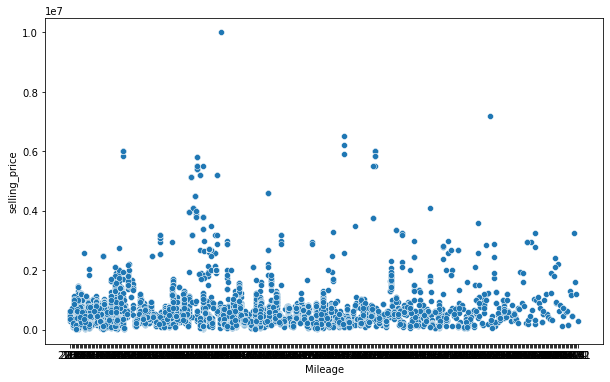

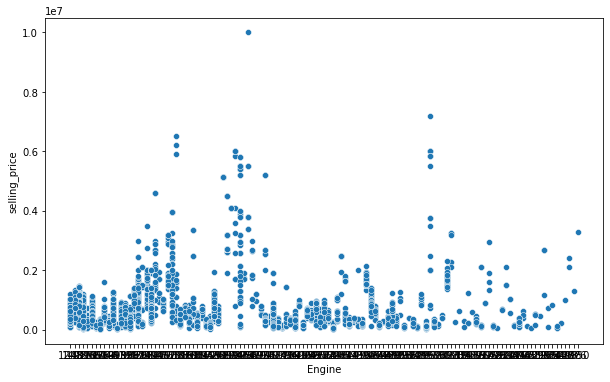

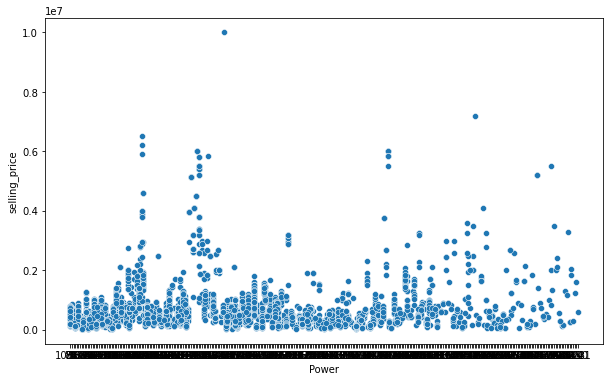

In [75]:
scatterplot(cols, 'selling_price', car3)

In [76]:
car3.select_dtypes(include=['number'])

,index,year,selling_price,km_driven,seats
0,0,2014,450000,145500,5.0
1,1,2014,370000,120000,5.0
2,2,2006,158000,140000,5.0
3,3,2010,225000,127000,5.0
4,4,2007,130000,120000,5.0
...,...,...,...,...,...
7962,8123,2013,320000,110000,5.0
7963,8124,2007,135000,119000,5.0
7964,8125,2009,382000,120000,5.0
7965,8126,2013,290000,25000,5.0


We can't find the newly added numerical columns in the above numerical function, so it means they are currently 
being treated as object, so convertung them to numerical field

In [77]:
car3['Mileage'] = car3['Mileage'].astype('double')

In [78]:
car3['Engine'] = car3['Engine'].astype('int')

In [79]:
car3['Power'] = car3['Power'].astype('double')

Now we can see the newly added columns in the numerical set

In [80]:
car3.select_dtypes(include = 'number')

,index,year,selling_price,km_driven,seats,Mileage,Engine,Power
0,0,2014,450000,145500,5.0,23.40,1248,74.00
1,1,2014,370000,120000,5.0,21.14,1498,103.52
2,2,2006,158000,140000,5.0,17.70,1497,78.00
3,3,2010,225000,127000,5.0,23.00,1396,90.00
4,4,2007,130000,120000,5.0,16.10,1298,88.20
...,...,...,...,...,...,...,...,...
7962,8123,2013,320000,110000,5.0,18.50,1197,82.85
7963,8124,2007,135000,119000,5.0,16.80,1493,110.00
7964,8125,2009,382000,120000,5.0,19.30,1248,73.90
7965,8126,2013,290000,25000,5.0,23.57,1396,70.00


Let's see if the newly extracted columns have any correlation with the Target Variable

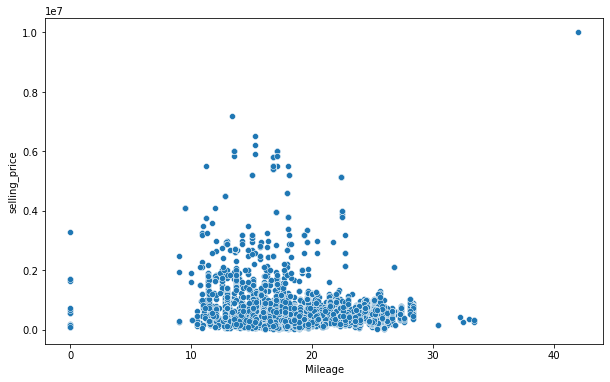

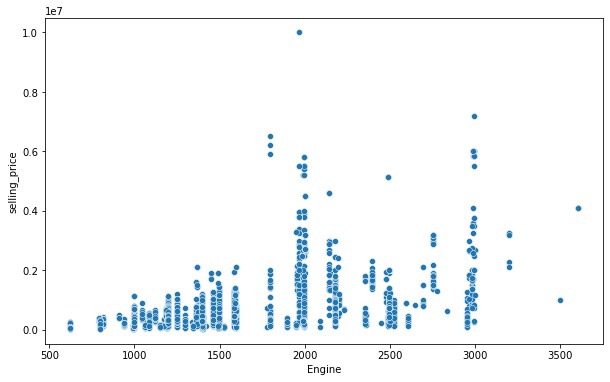

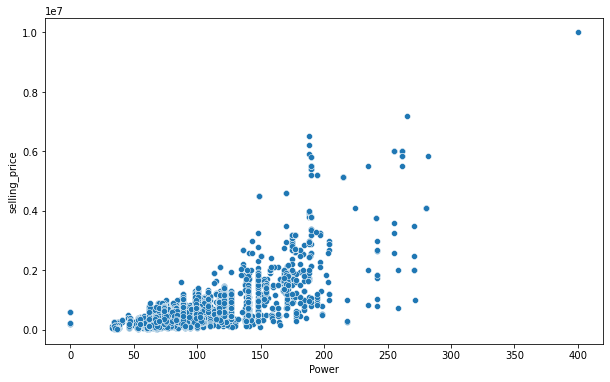

In [81]:
scatterplot(cols, 'selling_price', car3)

<AxesSubplot:>

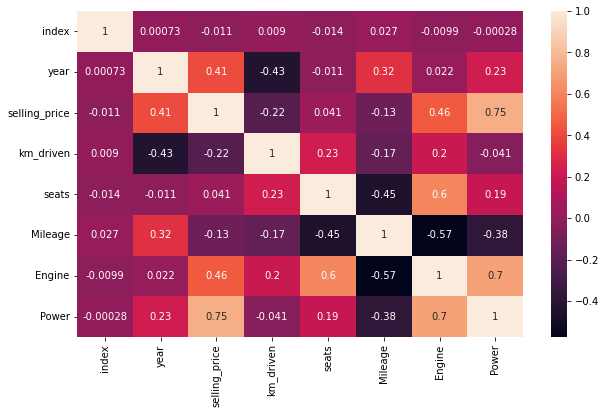

In [82]:
sns.heatmap(car3.corr(), annot = True)

### Observation

  
- On Observing both the scatterplots and the heatmap above we find that 'Power' column has the most clear correlation with the Target column i.e 'selling_price'.

- Engine has also some correlation with the target variable but it has a higher correlation with the "Power" column so it is the case of multi-collinearity so we will remove one of these columns later

Let's check Torque now

In [83]:
car3['torque'].value_counts()

190Nm@ 2000rpm             555
200Nm@ 1750rpm             445
90Nm@ 3500rpm              407
113Nm@ 4200rpm             223
114Nm@ 4000rpm             171
                          ... 
128Nm@ 3100rpm               1
72.9Nm@ 2250rpm              1
155 Nm at 1600-2800 rpm      1
510Nm@ 1600-2800rpm          1
96  Nm at 3000  rpm          1
Name: torque, Length: 441, dtype: int64

In [84]:
Torque = []
for i in range(car3.shape[0]):
    Torque.append(re.findall(r'([0-9\.]+)',car3['torque'][i])[0])

In [85]:
Torque

['190',
 '250',
 '12.7',
 '22.4',
 '11.5',
 '113.75',
 '7.8',
 '59',
 '170',
 '160',
 '248',
 '78',
 '190',
 '84',
 '115',
 '200',
 '22.4',
 '62',
 '219.7',
 '160',
 '200',
 '190',
 '200',
 '114',
 '115',
 '69',
 '172.5',
 '84',
 '59',
 '200',
 '6.1',
 '114.7',
 '200',
 '60',
 '90',
 '151',
 '104',
 '320',
 '59',
 '250',
 '145',
 '146',
 '115',
 '200',
 '90',
 '343',
 '200',
 '200',
 '200',
 '400',
 '200',
 '138',
 '200',
 '360',
 '200',
 '380',
 '173',
 '400',
 '400',
 '200',
 '111.7',
 '219.6',
 '190',
 '112',
 '115',
 '250',
 '200',
 '90',
 '250',
 '200',
 '200',
 '111.7',
 '190',
 '343',
 '190',
 '130',
 '250',
 '200',
 '205',
 '280',
 '90',
 '104',
 '69',
 '69',
 '99.04',
 '6.1',
 '77',
 '110',
 '99.04',
 '153',
 '90',
 '113.7',
 '190',
 '114',
 '62',
 '219.7',
 '90',
 '200',
 '113',
 '101',
 '115',
 '290',
 '120',
 '151',
 '250',
 '96',
 '360',
 '135',
 '259.8',
 '219.6',
 '173',
 '90',
 '200',
 '115',
 '90',
 '190',
 '200',
 '259.9',
 '205',
 '190',
 '91',
 '90',
 '62',
 '200',


In [86]:
car3['Torque'] = Torque

In [87]:
car3['Torque'] = car3['Torque'].astype('double')

Let's see if Torque has any correlation with selling price

<AxesSubplot:xlabel='Torque', ylabel='selling_price'>

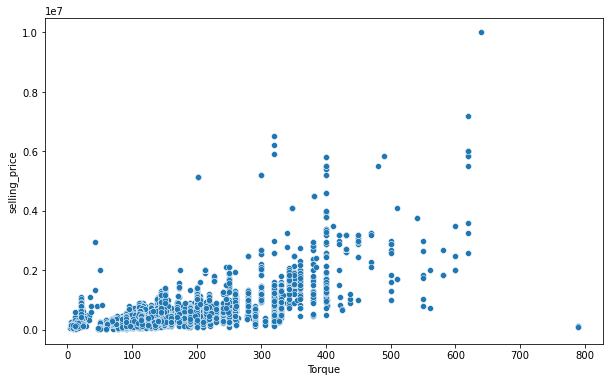

In [88]:
sns.scatterplot(x='Torque', y = 'selling_price', data = car3)

<AxesSubplot:>

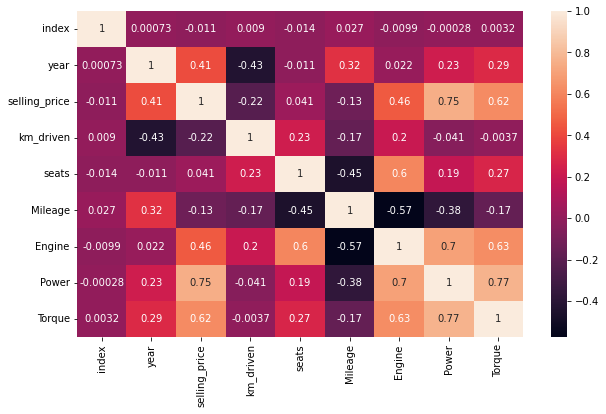

In [89]:
sns.heatmap(car3.corr(), annot = True)

### Summary

We were able to successfully extract the useful parts from columns into separate columns.

After checking the correlation between Target and newly generated columns, we found that - 
  
-  'Power' column has the most clear correlation with the Target column i.e 'selling_price'.

- Engine has also some correlation with the target variable but it has a higher correlation with the 'Power' column so it is a case of multi-collinearity so we will remove one of these columns later

- Similary, column 'Torque' and 'selling_price' has some correlation but 'Torque' has even higher correlation with column 'Power' which makes it a case of mulit-collinearity, so here also we will drop one column later

In [90]:
car3.head(2)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Brand_Name,Mileage,Engine,Power,Torque
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.40,1248,74.00,190.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52,250.0


Now, Let's drop the columns from which have already extracted all the usable data in separate columns

In [91]:
car3.drop(['name','mileage','index','engine','max_power','torque'], axis = 1, inplace = True)

In [92]:
car3.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.40,1248,74.00,190.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,1498,103.52,250.00
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.70,1497,78.00,12.70
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.00,1396,90.00,22.40
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.10,1298,88.20,11.50
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,20.14,1197,81.86,113.75
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,Maruti,17.30,1061,57.50,7.80
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,Maruti,16.10,796,37.00,59.00
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,Toyota,23.59,1364,67.10,170.00
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,Ford,20.00,1399,68.10,160.00


## Handling the Categorical Columns 

There are some very popular methods to handle Categorical columns like One-Hot Enccoding, Label Encoder, Pandas.get_dummies etc. but on analyzing each of the methods I thought that I don't want to simply convert my categorical columns into numerical values without retaining the order or it's relation with the Target Variable.

So the method used by me is similar to Label Encoder but unlike Label Encoder it takes into account the average value of the target column for each element in the categorical column then it replaces them with the numerical values in the order of increasing average value of the Target column.

In [93]:
cat_cols = car3.select_dtypes(exclude = 'number')

In [94]:
cat_cols

,fuel,seller_type,transmission,owner,Brand_Name
0,Diesel,Individual,Manual,First Owner,Maruti
1,Diesel,Individual,Manual,Second Owner,Skoda
2,Petrol,Individual,Manual,Third Owner,Honda
3,Diesel,Individual,Manual,First Owner,Hyundai
4,Petrol,Individual,Manual,First Owner,Maruti
...,...,...,...,...,...
7962,Petrol,Individual,Manual,First Owner,Hyundai
7963,Diesel,Individual,Manual,Fourth & Above Owner,Hyundai
7964,Diesel,Individual,Manual,First Owner,Maruti
7965,Diesel,Individual,Manual,First Owner,Tata


Getting the average 'selling_price' for each element in the column 'Brand_Name' in the ascending order. 

In [95]:
Brand = car3.groupby('Brand_Name')['selling_price'].mean().sort_values(ascending = True)

Converting it into a dataframe

In [96]:
Brand = pd.DataFrame(Brand)

Creating a new column to store the order of the elements in the dataframe

In [97]:
Brand['Mapping'] = 99

They are already in the ascending order so by simply using 'for' loop adding the order for each row

In [98]:
for i in range(Brand.shape[0]):
    Brand['Mapping'][i] = i + 1

So, we got all the elements of column 'Brand_Name' in the order of increasing average of the target column 'selling_price'

In [99]:
Brand

,selling_price,Mapping
Brand_Name,,
Opel,6.800000e+04,1
Daewoo,7.700000e+04,2
Ambassador,1.240000e+05,3
Chevrolet,2.738675e+05,4
Ashok,3.000000e+05,5
Datsun,3.146000e+05,6
Fiat,3.171951e+05,7
Tata,3.615158e+05,8
Maruti,4.068720e+05,9


In [100]:
Brand.index[0]

'Opel'

Storing the Index in a column for creating a Dictionary later

In [101]:
Brand["Brand_index"] = 'a'

In [102]:
for i in range(Brand.shape[0]):
    Brand['Brand_index'][i] = Brand.index[i]

In [103]:
Brand

,selling_price,Mapping,Brand_index
Brand_Name,,,
Opel,6.800000e+04,1,Opel
Daewoo,7.700000e+04,2,Daewoo
Ambassador,1.240000e+05,3,Ambassador
Chevrolet,2.738675e+05,4,Chevrolet
Ashok,3.000000e+05,5,Ashok
Datsun,3.146000e+05,6,Datsun
Fiat,3.171951e+05,7,Fiat
Tata,3.615158e+05,8,Tata
Maruti,4.068720e+05,9,Maruti


In [104]:
Brand_dict = Brand.set_index('Brand_index')['Mapping'].to_dict()

So we got this dictionary below which we will use to replace the values in the categorical column 'Brand_Name'

In [105]:
Brand_dict

{'Opel': 1,
 'Daewoo': 2,
 'Ambassador': 3,
 'Chevrolet': 4,
 'Ashok': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Tata': 8,
 'Maruti': 9,
 'Renault': 10,
 'Nissan': 11,
 'Hyundai': 12,
 'Volkswagen': 13,
 'Ford': 14,
 'Honda': 15,
 'Skoda': 16,
 'Mahindra': 17,
 'Mitsubishi': 18,
 'Force': 19,
 'Toyota': 20,
 'Kia': 21,
 'MG': 22,
 'Isuzu': 23,
 'Jeep': 24,
 'Mercedes': 25,
 'Audi': 26,
 'Jaguar': 27,
 'Volvo': 28,
 'Land': 29,
 'BMW': 30,
 'Lexus': 31}

In [106]:
car3 = car3.replace({'Brand_Name':Brand_dict})

In [107]:
car3.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,9,23.40,1248,74.00,190.00
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,16,21.14,1498,103.52,250.00
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,15,17.70,1497,78.00,12.70
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,12,23.00,1396,90.00,22.40
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,9,16.10,1298,88.20,11.50
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,12,20.14,1197,81.86,113.75
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,9,17.30,1061,57.50,7.80
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,9,16.10,796,37.00,59.00
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,20,23.59,1364,67.10,170.00
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,14,20.00,1399,68.10,160.00


So, we were able to replace the column 'Brand_Name' categorical values with the numerical value in the increasing order of the average of the Target Column

### Creating a function for above steps

Writing a function to carry out all the above steps in one go and it is always great to write a function to carry out these kind of steps as we will have to handle multiple categorcal columns, so once we have written a function we can easily run these steps multiple times wtihout any extra effort

In [108]:
def Handle_Cat_Columns(cat, car3):
    Temp_df = car3.groupby(cat)['selling_price'].mean().sort_values(ascending = True)
    Temp_df = pd.DataFrame(Temp_df)
    Temp_df['Mapping'] = 1
    Temp_df['Index'] = 'a'
    for i in range(Temp_df.shape[0]):
        Temp_df['Mapping'][i] = i + 1
        Temp_df['Index'][i] = Temp_df.index[i]
    
    dict = Temp_df.set_index('Index')['Mapping'].to_dict()
    car3 = car3.replace({cat:dict})
    
    return car3

In [109]:
car3 = Handle_Cat_Columns('fuel', car3)

In [110]:
cols = ['seller_type', 'transmission', 'owner']

In [111]:
for col in cols:
    car3 = Handle_Cat_Columns(col,car3)

In [112]:
car3.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014,450000,145500,4,1,1,4,5.0,9,23.40,1248,74.00,190.00
1,2014,370000,120000,4,1,1,3,5.0,16,21.14,1498,103.52,250.00
2,2006,158000,140000,3,1,1,2,5.0,15,17.70,1497,78.00,12.70
3,2010,225000,127000,4,1,1,4,5.0,12,23.00,1396,90.00,22.40
4,2007,130000,120000,3,1,1,4,5.0,9,16.10,1298,88.20,11.50
5,2017,440000,45000,3,1,1,4,5.0,12,20.14,1197,81.86,113.75
6,2007,96000,175000,1,1,1,4,5.0,9,17.30,1061,57.50,7.80
7,2001,45000,5000,3,1,1,3,4.0,9,16.10,796,37.00,59.00
8,2011,350000,90000,4,1,1,4,5.0,20,23.59,1364,67.10,170.00
9,2013,200000,169000,4,1,1,4,5.0,14,20.00,1399,68.10,160.00


### Summary

All Categorical columns have been handled now using the function we created.

## Feature Selection

The Goal of the Feature Selection process is to keep only those columns which have some clear correlation with the Target Variable and to remove all columns which have no useful correlation with the Target Variable and also to remove columns which are contributing to the Multi-Collinearity, since multi-collinearity does not contribute in making the model better.

So we will be doing following things to select the Best Features from the given features to train our model with:- 

- Going through each column one by one and analyzing it if they are really required

- Creating Simple Linear Regression models with one column as predictor to compare it with the model trained on whole feature set in order to determine effect of individual columns

- We will also add scaling to check if it improves our model

- Handling Multi-Collinearity by removing Columns which are highly correlated with other columns

- Removing Low-correlated columns

Let's check correlation and scatterplot for each columns as all of them are now a numerical columns

In [113]:
num_cols = car3.select_dtypes(include = 'number')

In [114]:
num_cols

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014,450000,145500,4,1,1,4,5.0,9,23.40,1248,74.00,190.0
1,2014,370000,120000,4,1,1,3,5.0,16,21.14,1498,103.52,250.0
2,2006,158000,140000,3,1,1,2,5.0,15,17.70,1497,78.00,12.7
3,2010,225000,127000,4,1,1,4,5.0,12,23.00,1396,90.00,22.4
4,2007,130000,120000,3,1,1,4,5.0,9,16.10,1298,88.20,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,2013,320000,110000,3,1,1,4,5.0,12,18.50,1197,82.85,113.7
7963,2007,135000,119000,4,1,1,1,5.0,12,16.80,1493,110.00,24.0
7964,2009,382000,120000,4,1,1,4,5.0,9,19.30,1248,73.90,190.0
7965,2013,290000,25000,4,1,1,4,5.0,8,23.57,1396,70.00,140.0


<AxesSubplot:>

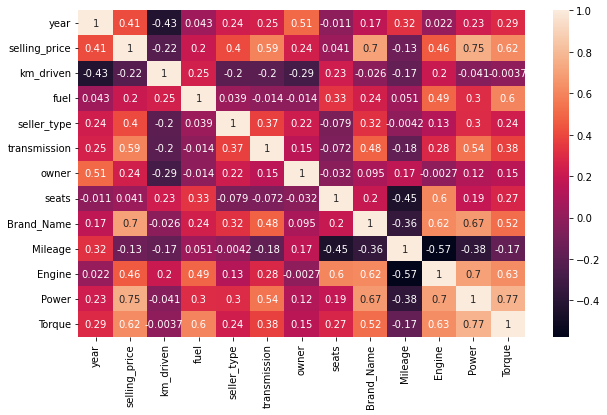

In [115]:
sns.heatmap(car3.corr(), annot = True)

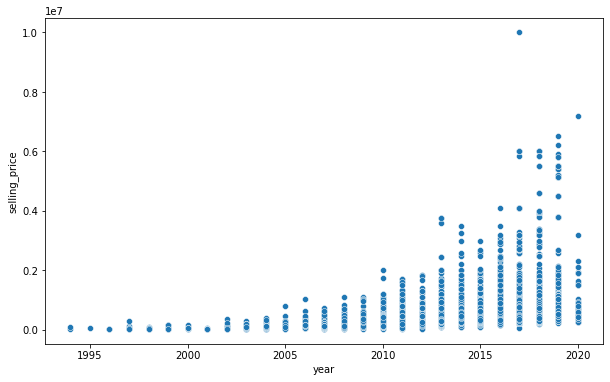

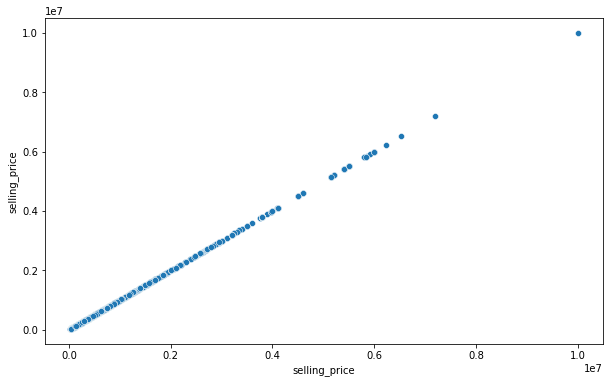

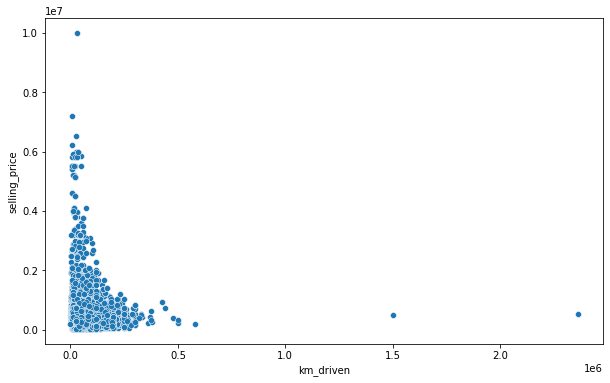

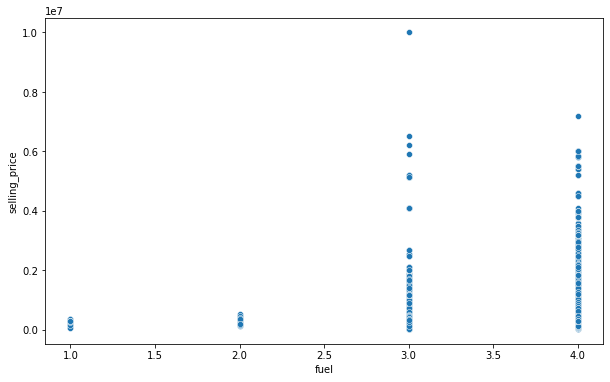

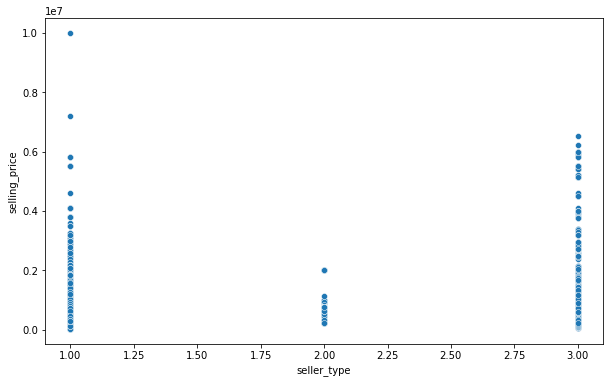

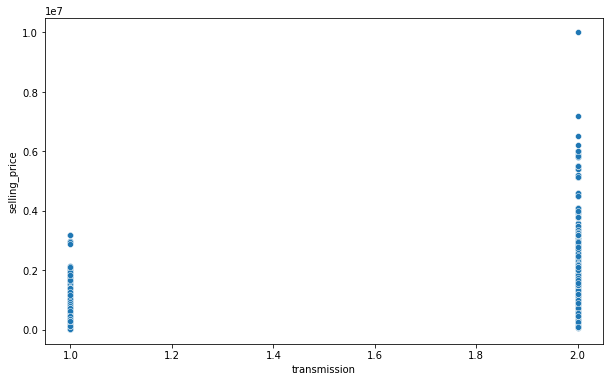

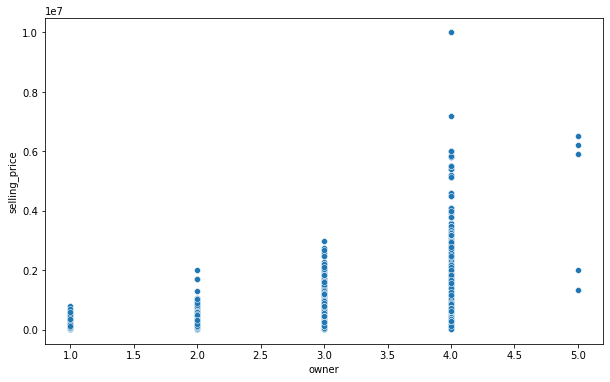

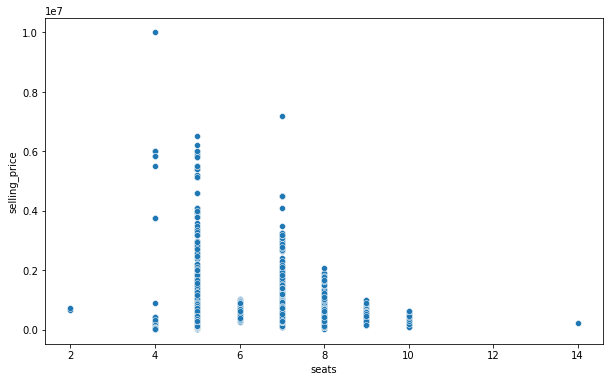

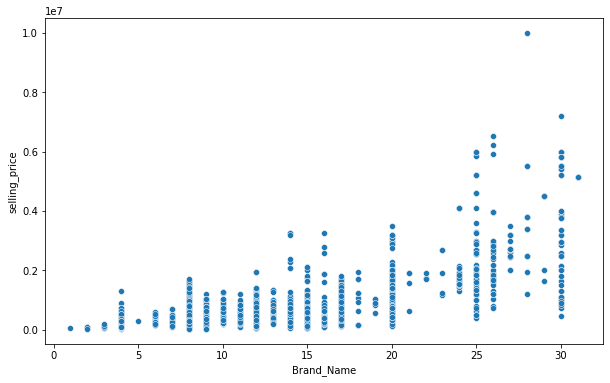

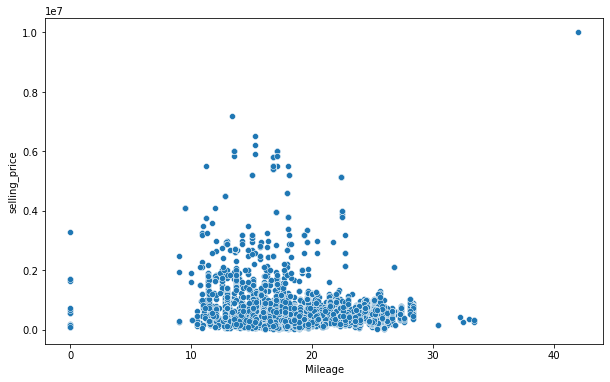

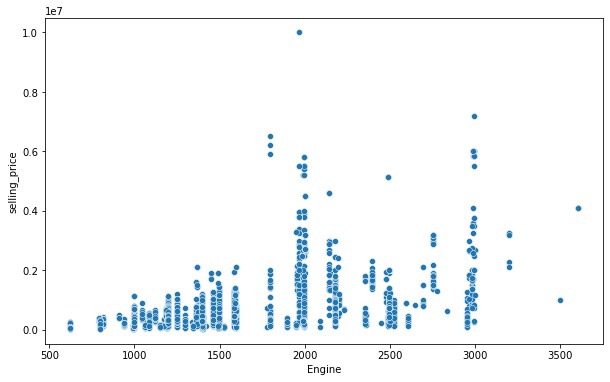

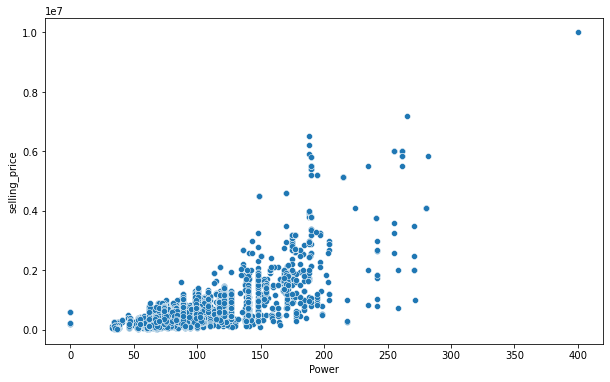

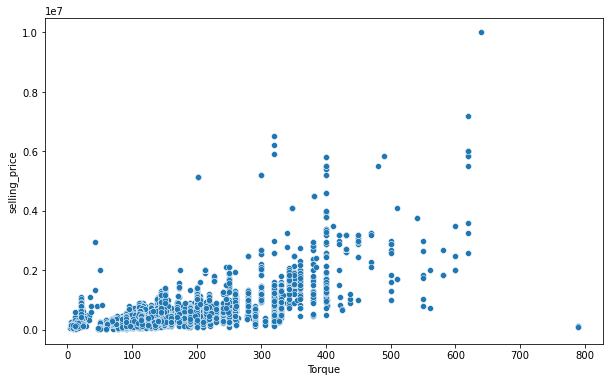

In [116]:
scatterplot(num_cols, 'selling_price', car3)

In [117]:
car3.corr()['selling_price'].sort_values(ascending=False)

selling_price    1.000000
Power            0.748607
Brand_Name       0.699011
Torque           0.619412
transmission     0.590753
Engine           0.456572
year             0.413494
seller_type      0.404196
owner            0.238752
fuel             0.201888
seats            0.040565
Mileage         -0.127891
km_driven       -0.223258
Name: selling_price, dtype: float64



-  From column 'Power' to 'fuel' all has some positive correlation with the column 'selling_price' but we can't determine which columns will be the best for our model without observing each column individually and because of the presence of multi-collinearity.


So, Let check for the multi - collinearity using variance_inflation_factor

In [118]:
car3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014,450000,145500,4,1,1,4,5.0,9,23.40,1248,74.00,190.0
1,2014,370000,120000,4,1,1,3,5.0,16,21.14,1498,103.52,250.0
2,2006,158000,140000,3,1,1,2,5.0,15,17.70,1497,78.00,12.7
3,2010,225000,127000,4,1,1,4,5.0,12,23.00,1396,90.00,22.4
4,2007,130000,120000,3,1,1,4,5.0,9,16.10,1298,88.20,11.5


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()

In [121]:
temp = car3.drop('selling_price', axis=1)

In [122]:
vif['columns'] = temp.columns

In [123]:
vif

,columns
0,year
1,km_driven
2,fuel
3,seller_type
4,transmission
5,owner
6,seats
7,Brand_Name
8,Mileage
9,Engine


In [124]:
vif['VIF'] = [ variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]

In [125]:
vif

,columns,VIF
0,year,210.586133
1,km_driven,3.233690
2,fuel,110.541635
3,seller_type,5.672524
4,transmission,20.836817
5,owner,31.423935
6,seats,69.061216
7,Brand_Name,14.704535
8,Mileage,52.493436
9,Engine,50.597344



- Can't determine anything from above as all of them have high vif values, so let's check the heatmap again

<AxesSubplot:>

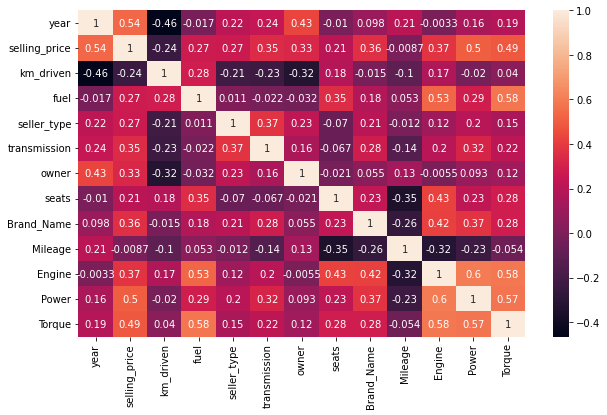

In [126]:
sns.heatmap(car3.corr(method = 'kendall'), annot=True )

- Different correlation methods pearson(default), Spearman and Kendall are giving different results 

So let't take one predictor column at a time and then may be we can take two columns at once and let's see if we can identify columns who gives more accurate results

We can start wtih the most correlated column with the Target Column which is Power

<AxesSubplot:xlabel='Power', ylabel='selling_price'>

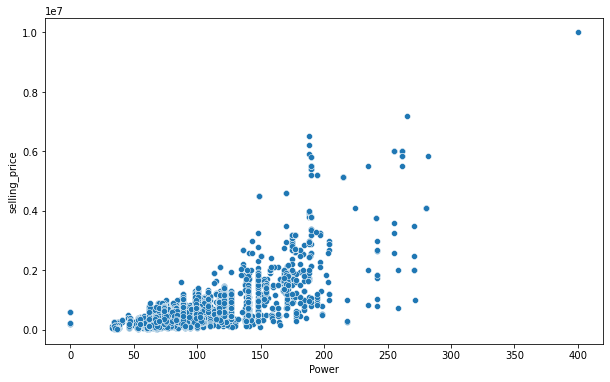

In [127]:
sns.scatterplot(x = 'Power', y='selling_price', data = car3)

### Handling the Errors

- We can see two data points at power 0 so let's check what are they, they definitely seem some kind of errors.

In [128]:
car3[car3['Power']==0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
563,2011,204999,97500,3,1,1,4,5.0,9,20.92,998,0.0,90.0
564,2011,204999,97500,3,1,1,4,5.0,9,20.92,998,0.0,90.0
1409,2017,589000,41232,4,3,1,4,5.0,9,26.59,1248,0.0,190.0
1410,2017,589000,41232,4,3,1,4,5.0,9,26.59,1248,0.0,190.0
2491,2012,240000,70000,4,1,1,4,5.0,8,22.30,1248,0.0,190.0
2492,2012,240000,70000,4,1,1,4,5.0,8,22.30,1248,0.0,190.0


-  We can see above that there are 6 different rows where column 'Power' is zero which is definitely an error so 
Replacing the zero value with the median power of the same engine 

In [129]:

car3[car3['Engine']==1248]['Power'].median()

74.0

In [130]:
car3.iloc[1409:1411]['Power'] = 74.0

In [131]:
car3.iloc[2491:2493] = 74.0

In [132]:
car3[car3['Engine']==998]['Power'].median()

67.05

In [133]:
car3.iloc[563:565] = 67.05

In [134]:
car3[car3['Power']==0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque


The errors in the column 'selling_price' have been handled.

<AxesSubplot:xlabel='Power', ylabel='selling_price'>

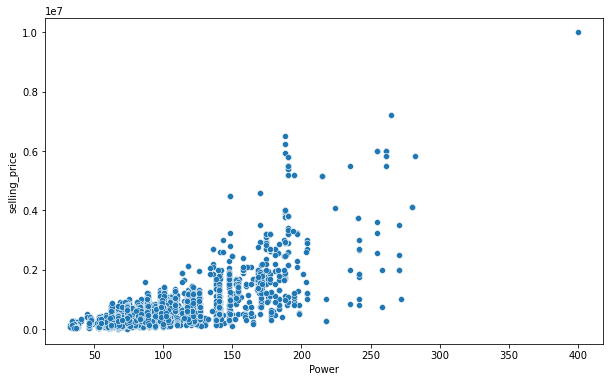

In [135]:
sns.scatterplot(x='Power', y='selling_price', data = car3)

In [136]:
car3.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'Brand_Name', 'Mileage', 'Engine',
       'Power', 'Torque'],
      dtype='object')

### Checking for Duplicates

Now Let's check if there are any Duplicate rows in the Dataset

In [137]:
Duplicate =  pd.DataFrame(car3.groupby(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'Brand_Name', 'Mileage', 'Engine',
       'Power', 'Torque'])['year'].count())

So, as we can below are many duplicates row in the dataset which we will have to remove

In [138]:
Duplicate[Duplicate['year']>1]

year
year    selling_price km_driven fuel  seller_type transmission owner seats Brand_Name Mileage Engine  Power  Torque      
67.05   67.05         67.05     67.05 67.05       67.05        67.05 67.05 67.05      67.05   67.05   67.05  67.05      2
74.00   74.00         74.00     74.00 74.00       74.00        74.00 74.00 74.00      74.00   74.00   74.00  74.00      2
1999.00 150000.00     198000.00 4.00  1.00        1.00         3.00  5.00  18.00      14.80   1998.00 68.00  12.50      2
2000.00 45957.00      90000.00  3.00  1.00        1.00         3.00  5.00  9.00       19.70   796.00  46.30  62.00      2
2003.00 55599.00      36088.00  3.00  1.00        1.00         4.00  4.00  9.00       16.10   796.00  37.00  59.00      2
...                                                                                                                   ...
2020.00 600000.00     5000.00   3.00  1.00        1.00         4.00  5.00  9.00       21.21   1197.00 81.80  113.00     2
                                                  2.00         4.00  5.00  9.00       20.89   1197.00 81.80  113.00     2
        1500000.00    40000.00  3.00  1.00        2.00         4.00  8.00  20.00      10.75   2694.00 163.70 245.00     2
        1900000.00    5000.00   4.00  3.00        2.00         4.00  5.00  21.00      17.80   1493.00 113.40 250.00     2
        2125000.00    5500.00   4.00  3.00        1.00         4.00  5.00  15.00      26.80   1597.00 118.00 300.00     2

[629 rows x 1 columns]

In [139]:
car3.shape

(7967, 13)

In [140]:
car3.drop_duplicates(inplace = True)

So, after dropping the duplicates, now we are left with 6753 rows as we can see below

In [141]:
car3.shape

(6753, 13)

In [142]:
from sklearn.model_selection import train_test_split

Must reset the index after dropping the rows if we index has to be used later

In [143]:
car3.reset_index(inplace = True)

In [144]:
car3.drop('index', axis = 1, inplace = True)

## Model Training

Training a Model before feature selection and further processing to get an idea that how good feature selection and correct pre-processing improves the model score

In [145]:
X = car3.drop('selling_price', axis = 1)

In [146]:
Y = car3['selling_price']

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.3, random_state = 1)

In [148]:
Y_test

2366    325000.0
929     170000.0
6662    130000.0
3851    270000.0
2418    760000.0
          ...   
1240    125000.0
2842    725000.0
1719    200000.0
4294    421000.0
2914    347000.0
Name: selling_price, Length: 2026, dtype: float64

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Creating a function to get all the evaluation metrics score required at once

In [151]:
Train_dataset = pd.DataFrame({'Desc':[],'Train_score':[], 'MAE':[], 'MSE':[], 'RMSE':[]})

In [152]:
def eval_score(Y_pred, Y, Desc, dataset):
    mse = mean_squared_error(Y, Y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y, Y_pred)
    R2 = r2_score(Y, Y_pred)
    
    a = dataset.append(pd.DataFrame({'Desc':[Desc],'Train_score':R2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}), ignore_index = True)
    
    print ('MSE :', mse)
    print('RMSE :', rmse)
    print('MAE :', mae)
    print('R2 :', R2)
    return a

Writing a function to train the model on a dataset and then also to print scores and plot a scatterplot of 'Predicted vs Actual Values'

In [153]:
def train_score(X_train, Y_train, col, Desc, dataset):
    LR_1 = LinearRegression()
    LR_1.fit(X_train, Y_train)
    Y_pred_1 = LR_1.predict(X_train)
    a = eval_score(Y_pred_1, Y_train, Desc, dataset)
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred_1)
    plt.title(' Actual vs Predicted values')
    return Y_pred_1, LR_1, a

MSE : 98942017512.04556
RMSE : 314550.5007340563
MAE : 175591.71060653147
R2 : 0.6543113859604557


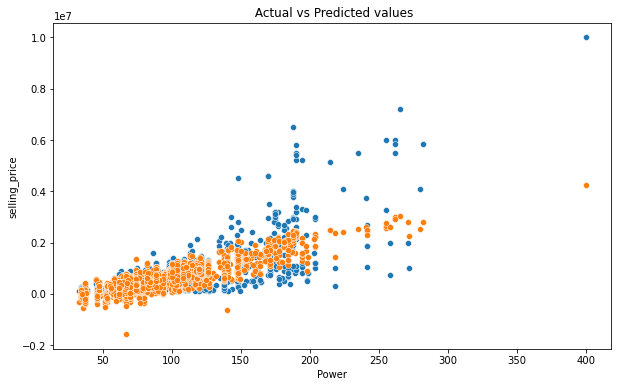

In [154]:
a, LR3, Train_dataset  = train_score(X_train, Y_train, 'Power', 'Linear Regression Model before Feature Selection', Train_dataset)

Will store the train scores of each unique model in the Train_dataset

In [155]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734


Writing a function to Predict the Target values using test Dataset and also to print score and plot scatterplot of Actual vs Predicted values

In [156]:
Test_dataset = pd.DataFrame({'Desc':[], 'Test_score':[], 'MAE':[], 'MSE':[], 'RMSE':[]})

In [157]:
def predict_score(X_test, Y_test, LR, col, Desc, dataset):
    Y_pred_2 = LR.predict(X_test)
    a = eval_score(Y_pred_2, Y_test, Desc, dataset)
    a['Test_score'][len(a)-1] = a['Train_score'][len(a)-1]
    a = a.drop('Train_score', axis = 1)
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred_2)
    plt.title('Actual vs Predicted values')
    return Y_pred_2, a

MSE : 88598689021.44643
RMSE : 297655.3191553049
MAE : 172869.95119759603
R2 : 0.6346324752773567


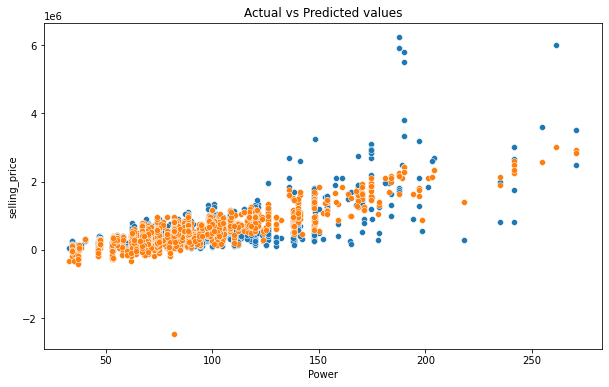

In [158]:
b, Test_dataset = predict_score(X_test, Y_test, LR3, 'Power', 'Linear Regression before Feature Selection', Test_dataset)

Will store the Test score of each unique Model in Test_datset

In [159]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155


In [160]:
LR3.coef_

array([ 1.41875396e+04, -1.20958978e+00, -1.53573335e+04,  3.93635310e+04,
        2.69456337e+05,  4.23766081e+04,  2.00539465e+04,  2.97970216e+04,
        1.32224969e+04, -5.07859222e+01,  6.99734724e+03,  9.03476659e+02])

### Training the Model on Single Columns

Now Let's train the model using only one column at a time starting with column 'Power' in order to understand the effect of each individual column on Predictions

In [161]:
X1 = X[['Power']]

In [162]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X1, Y, test_size = 0.3, random_state = 1)

MSE : 145751148954.6366
RMSE : 381773.68813819083
MAE : 223821.40865204876
R2 : 0.4907672802339459


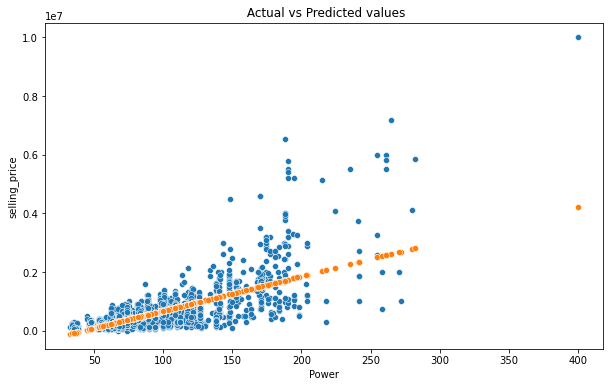

In [163]:
a, LR4, Train_dataset = train_score(X_train2, Y_train2, 'Power', 'Simple Linear Regression using Power column', Train_dataset)

MSE : 133741611752.93942
RMSE : 365707.00260309404
MAE : 224364.8123667424
R2 : 0.44846992457461865


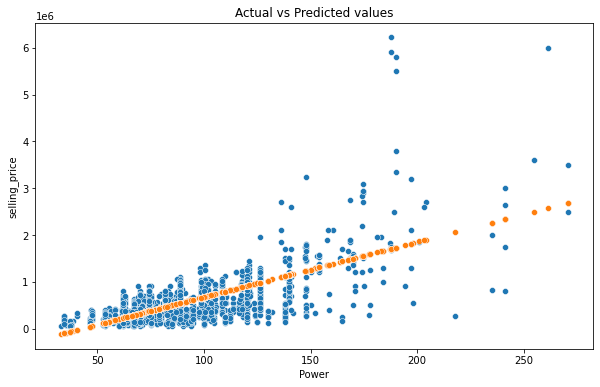

In [164]:
b, Test_dataset = predict_score(X_test2, Y_test2, LR4, 'Power','Simple Linear Regression using Power column', Test_dataset)

In [165]:
LR4.coef_

array([11758.32572443])

In [166]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138


In [167]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603


### Summary

By observing the Train and Test scores above, we can see that - 

- On training the simple linear regression model with just a single col 'Power' is giving train_score of .49 and test_score of .44.

- It means that col 'Power' alone can achieve upto the 70% of score that was achieved by using the entire feature set.

- So, we just have to choose the columns carefully on the basis of correlation, importance and by eliminating multi-collinearity, it will definitely improve the scores.

Now let's try categorical columns

In [168]:
car3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014.0,450000.0,145500.0,4.0,1.0,1.0,4.0,5.0,9.0,23.40,1248.0,74.00,190.0
1,2014.0,370000.0,120000.0,4.0,1.0,1.0,3.0,5.0,16.0,21.14,1498.0,103.52,250.0
2,2006.0,158000.0,140000.0,3.0,1.0,1.0,2.0,5.0,15.0,17.70,1497.0,78.00,12.7
3,2010.0,225000.0,127000.0,4.0,1.0,1.0,4.0,5.0,12.0,23.00,1396.0,90.00,22.4
4,2007.0,130000.0,120000.0,3.0,1.0,1.0,4.0,5.0,9.0,16.10,1298.0,88.20,11.5


Let's try Brand_Name

In [169]:
X2 = car3[['Brand_Name']]

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size =  0.3, random_state = 1)

MSE : 204099557897.75238
RMSE : 451773.7906272921
MAE : 268993.14548671275
R2 : 0.28690666442931434


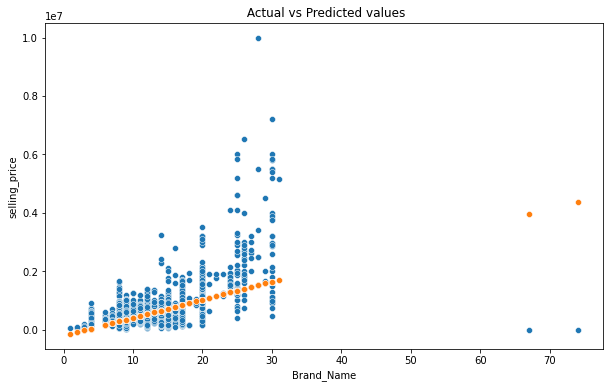

In [171]:
a, model1, b = train_score(X_train, Y_train, 'Brand_Name','SLR using Brand_Name col', Test_dataset)

MSE : 175574522857.36414
RMSE : 419016.13675056014
MAE : 263304.49831918837
R2 : 0.27595735863285564


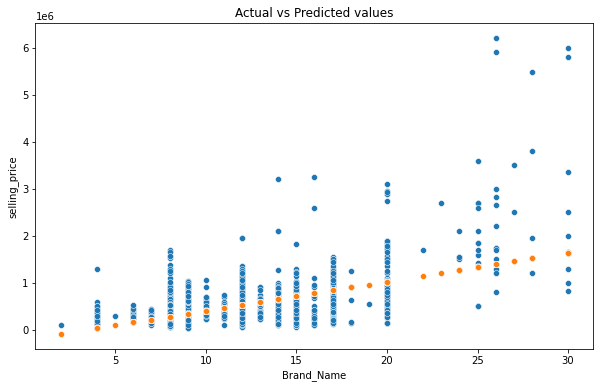

In [172]:
b, temp  = predict_score(X_test, Y_test, model1, 'Brand_Name','SLR', Test_dataset)

### Summary

Not adding the scores in Train and Test Dataset as we have already stored scores of Simple Linear regression trained on the col 'Power' which are better than current Simple Regression Model trained on col 'Brand_Name'.

In [173]:
LR3.coef_

array([ 1.41875396e+04, -1.20958978e+00, -1.53573335e+04,  3.93635310e+04,
        2.69456337e+05,  4.23766081e+04,  2.00539465e+04,  2.97970216e+04,
        1.32224969e+04, -5.07859222e+01,  6.99734724e+03,  9.03476659e+02])

In [174]:
model1.coef_

array([62013.28544675])

In [175]:
X3 = car3[['Torque']]

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.3, random_state=1)

MSE : 178825348245.93604
RMSE : 422877.4624473809
MAE : 238903.1503535524
R2 : 0.37521097361138245


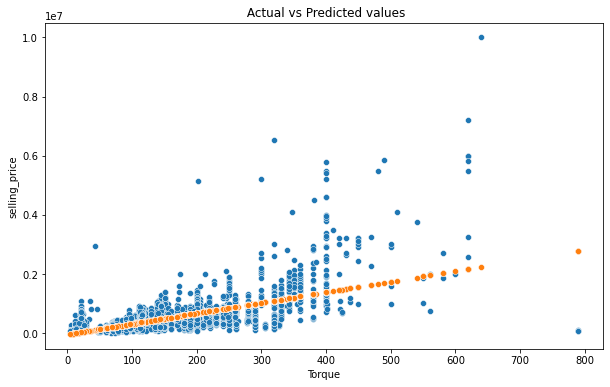

In [177]:
a, model2, temp_dataset = train_score(X_train, Y_train, 'Torque', 'SLR using Torque', Train_dataset)

MSE : 147183625419.63022
RMSE : 383645.18167133315
MAE : 227951.89577761877
R2 : 0.393037103672518


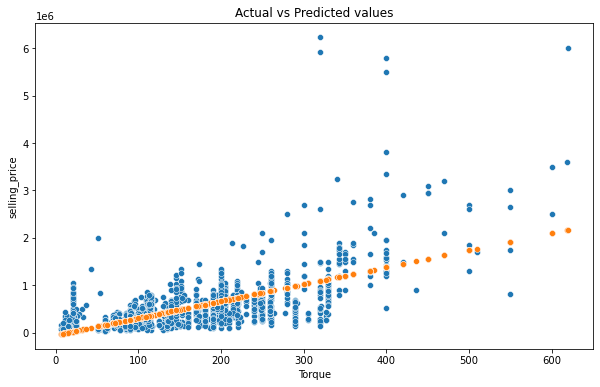

In [178]:
b, temp_dataset2 = predict_score(X_test, Y_test, model2, 'Torque','SLR using Torque', Test_dataset)

### Summary

Not adding the scores in score datasets for same reason as stated above for col 'Brand_Name'

In [179]:
model2.coef_

array([3569.22329537])

### Summary

- We Trained our model using the whole feature set at once and also one by one using single columns

- We can clearly see how the model score varies in the both cases

Thus, in order to determine which columns we should keep and which columns we should drop, let's analyze each column one by one.

In [180]:
car3.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
0,2014.0,450000.0,145500.0,4.0,1.0,1.0,4.0,5.0,9.0,23.40,1248.0,74.00,190.0
1,2014.0,370000.0,120000.0,4.0,1.0,1.0,3.0,5.0,16.0,21.14,1498.0,103.52,250.0
2,2006.0,158000.0,140000.0,3.0,1.0,1.0,2.0,5.0,15.0,17.70,1497.0,78.00,12.7
3,2010.0,225000.0,127000.0,4.0,1.0,1.0,4.0,5.0,12.0,23.00,1396.0,90.00,22.4
4,2007.0,130000.0,120000.0,3.0,1.0,1.0,4.0,5.0,9.0,16.10,1298.0,88.20,11.5


Let's start with column 'year'

<AxesSubplot:xlabel='year'>

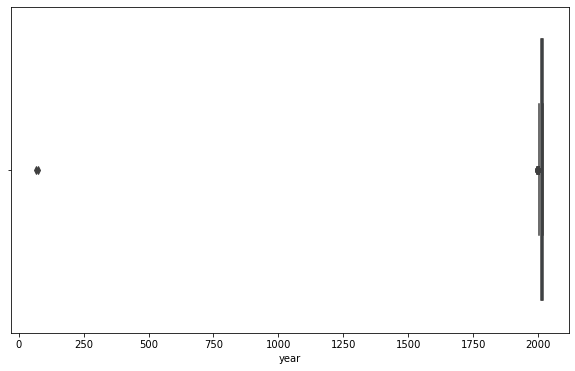

In [181]:
sns.boxplot(car3['year'])

- In the above boxplot we can clearly see that there are data points which belong to year < 250 which is definitely an error which we will resolve

In [182]:
car3[car3['year']<250]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Brand_Name,Mileage,Engine,Power,Torque
535,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05,67.05
2291,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00


In [183]:
car3.drop(535, axis=0, inplace = True)

In [184]:
car3.drop(2291, axis=0, inplace = True)

Those error points have been removed as we can see below in the boxplot

<AxesSubplot:xlabel='year'>

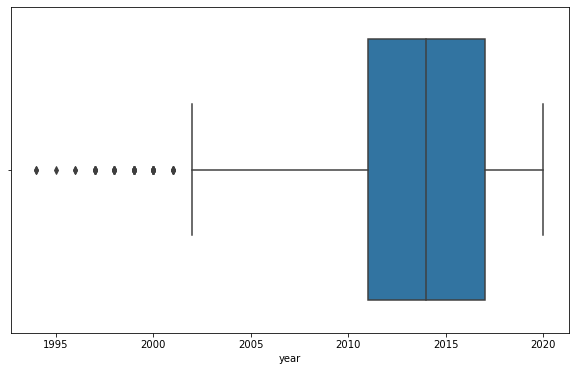

In [185]:
sns.boxplot(car3['year'])

In [186]:
car3['year'].value_counts()

2017.0    799
2016.0    687
2015.0    678
2018.0    605
2012.0    595
2014.0    579
2013.0    559
2011.0    542
2010.0    368
2019.0    347
2009.0    231
2008.0    196
2007.0    166
2006.0    103
2005.0     72
2020.0     63
2004.0     49
2003.0     37
2002.0     19
2000.0     14
1999.0     13
1998.0      9
1997.0      9
2001.0      6
1994.0      2
1996.0      2
1995.0      1
Name: year, dtype: int64

- It's like before 2000 the data points are seeming as outliers so we can remove them also later after analyzing other columns

Let's check column 'km_driven' now

<AxesSubplot:xlabel='km_driven'>

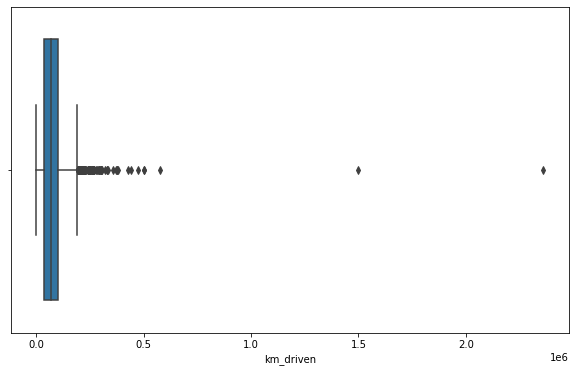

In [187]:
sns.boxplot(car3['km_driven'])

Km_driven has a negative correlation of .24 with the selling_price so we can keep it 

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

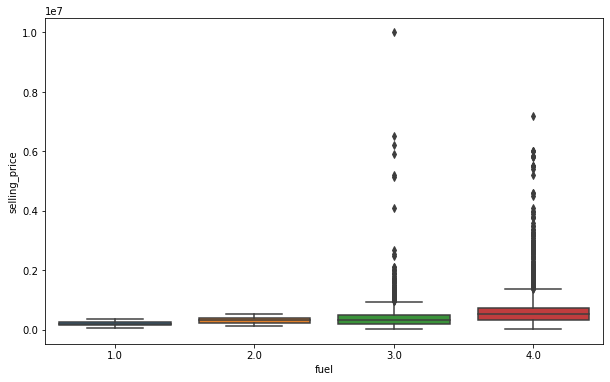

In [188]:
sns.boxplot(car3['fuel'], car3['selling_price'])

Fuel has also a correlation of 0.36 so let's keep it for now

<AxesSubplot:>

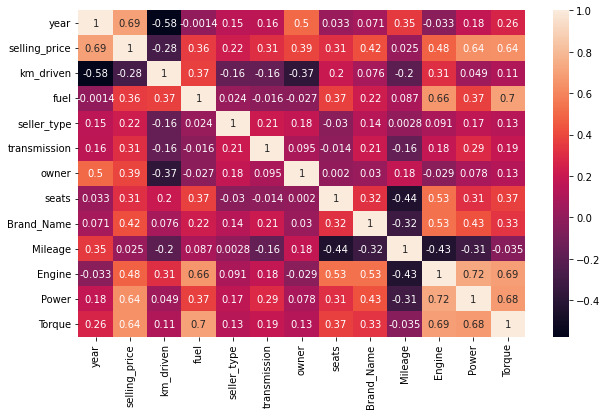

In [189]:
sns.heatmap(car3.corr(method = 'spearman'), annot = True)

We can use transmission as there is some difference between the two data points

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

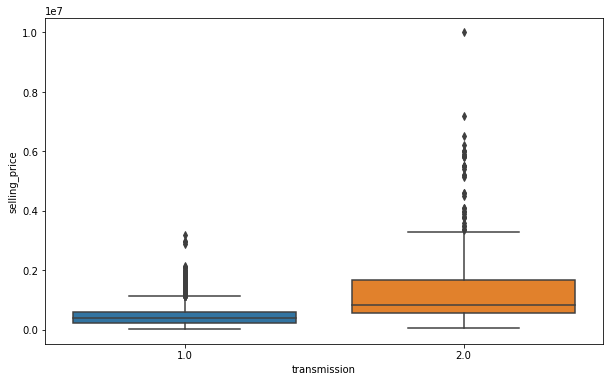

In [190]:
sns.boxplot(car3['transmission'], car3['selling_price'])

Column 'seller_type' don't have much clear difference between the different values  and does not have a high correlation, so we can drop it later

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

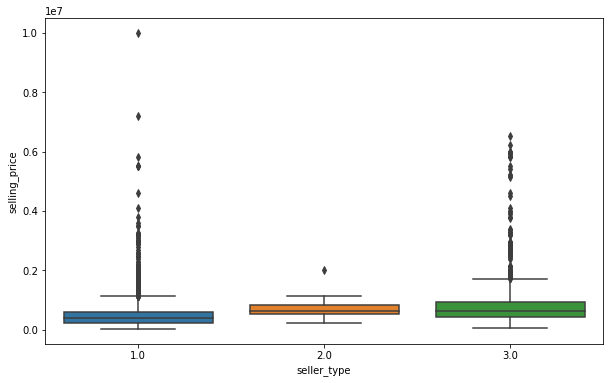

In [191]:
sns.boxplot(car3['seller_type'], car3['selling_price'])

In [192]:
Drop_cols = []
Drop_cols.append('seller_type')

Owner has a correlation of .39 and have some difference in avg values for different value of owner, so we can keep 
it

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

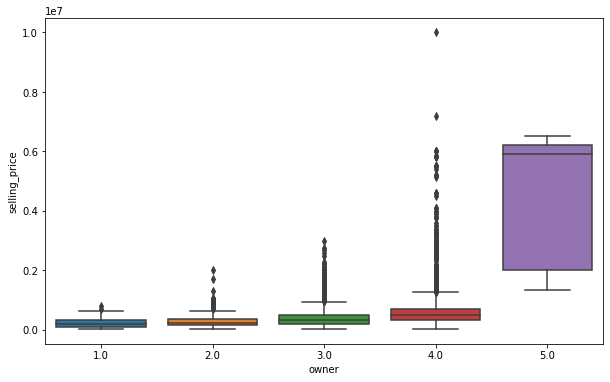

In [193]:
sns.boxplot(car3['owner'], car3['selling_price'])

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

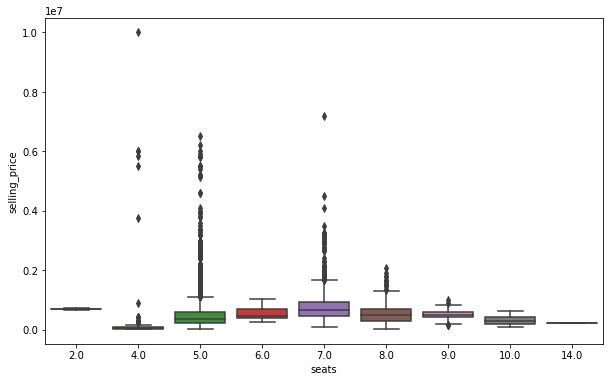

In [194]:
sns.boxplot(car3['seats'], car3['selling_price'])

We can drop the column 'seats' as it dosen't have that much high correlation as well as it does'nt have any specific order because 2 seat ferrari cost lot more that any 5 seat common brand

In [195]:
car3.groupby('seats')['selling_price'].mean().sort_values(ascending = False)

seats
7.0     799546.273673
2.0     700500.000000
6.0     560684.210526
8.0     555265.178261
9.0     503540.472973
5.0     477134.308668
4.0     386807.266129
10.0    328777.611111
14.0    235000.000000
Name: selling_price, dtype: float64

In [196]:
Drop_cols.append('seats')

Column 'Brand_Name' has some correlation so we can keep it

<AxesSubplot:xlabel='Brand_Name', ylabel='selling_price'>

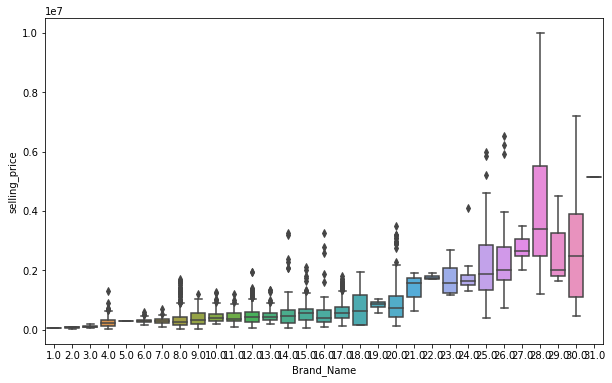

In [197]:
sns.boxplot(car3['Brand_Name'], car3['selling_price'])

Column 'Mileage' has a very little correlation, so we can remove it

<AxesSubplot:xlabel='Mileage', ylabel='selling_price'>

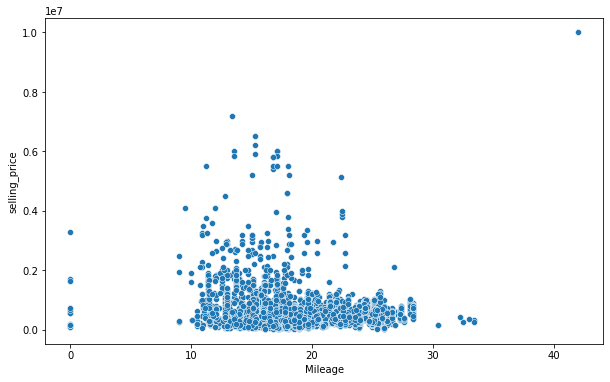

In [198]:
sns.scatterplot(car3['Mileage'], car3['selling_price'])

In [199]:
Drop_cols.append('Mileage')

<AxesSubplot:xlabel='Engine', ylabel='selling_price'>

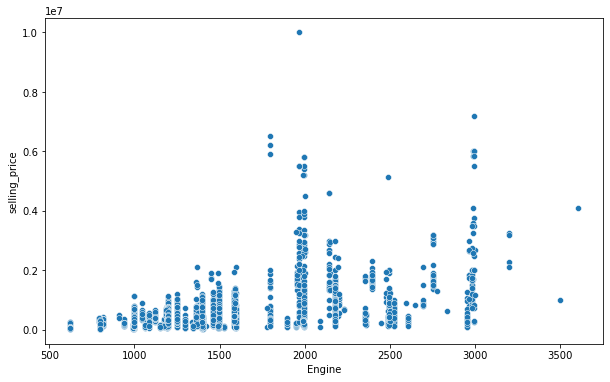

In [200]:
sns.scatterplot(car3['Engine'], car3['selling_price'])

- Since columns  'Engine' and 'Power' are higly correlated so in order to remove multi-collinearity we can drop the column 'Engine'.

In [201]:
car3.groupby('Engine')['selling_price'].mean().sort_values(ascending = False)

Engine
1969.0    5.640000e+06
2487.0    5.150000e+06
3604.0    4.100000e+06
2993.0    3.681538e+06
2987.0    3.483125e+06
              ...     
1527.0    8.875000e+04
993.0     8.050000e+04
1343.0    8.000000e+04
1489.0    7.500000e+04
1590.0    5.000000e+04
Name: selling_price, Length: 121, dtype: float64

In [202]:
Drop_cols.append('Engine')

<AxesSubplot:xlabel='Power'>

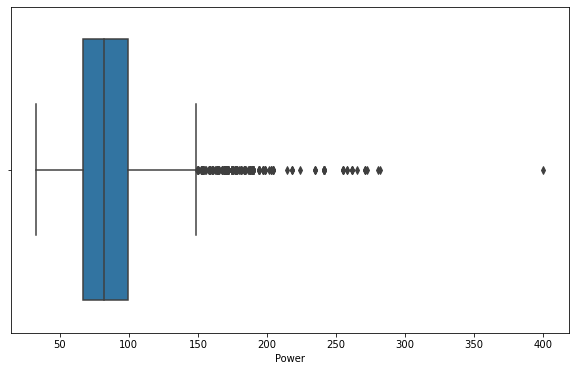

In [203]:
sns.boxplot(car3['Power'])

<AxesSubplot:xlabel='Power', ylabel='selling_price'>

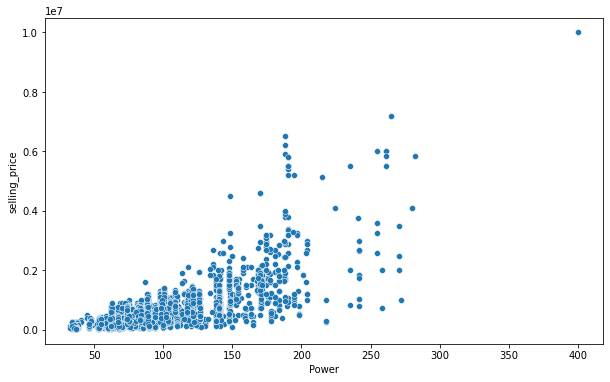

In [204]:
sns.scatterplot(car3['Power'], car3['selling_price'])

# Handling the Outliers 

Outliers are of two types - 
1. Datapoints that are way larger or smaller than the average population 

2. Datapoints that are unusual to the normal population which we can determine if we understand the dataset and have some domain knowledge about the dataset.

So, We can remove these kind of data points which are either very away from the normal population or seems unusual to normal population.

In [205]:
Drop_index = []

There is only data point which has power larger than 350, so we can drop it

In [206]:
Drop_index.append(car3[car3['Power']>350].index[0])

Data points having power less than 200 and selling_price greater than 5000000 seems unusual to the normal population, so we can remove them

In [207]:
for i in car3[(car3['Power']<200) & (car3['selling_price']>5000000) ].index[:].values:
    Drop_index.append(i)

In [208]:
Drop_index

[165, 134, 369, 370, 3970, 4185, 4186, 4187, 4435, 6167, 6585]

In [209]:
car3.drop(Drop_index, axis = 0, inplace = True)

<AxesSubplot:xlabel='Power', ylabel='selling_price'>

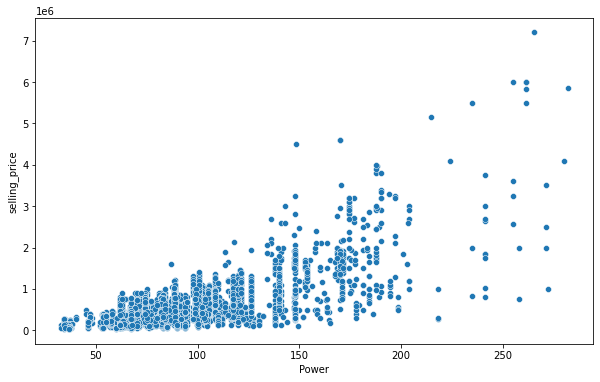

In [210]:
sns.scatterplot(car3['Power'], car3['selling_price'])

<AxesSubplot:xlabel='Power', ylabel='Torque'>

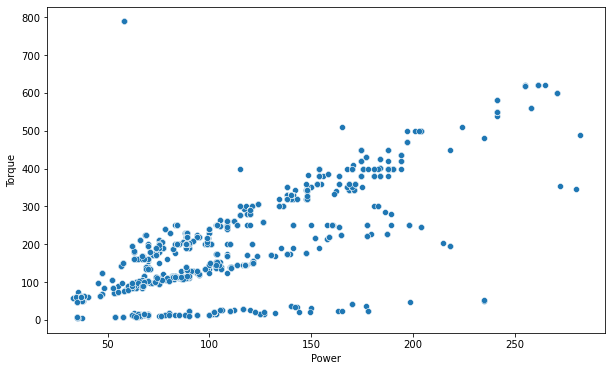

In [211]:
sns.scatterplot(car3['Power'], car3['Torque'])

We can drop Torque too as it's not much clear pattern and has a strong correlation with Power too

<AxesSubplot:xlabel='Torque', ylabel='selling_price'>

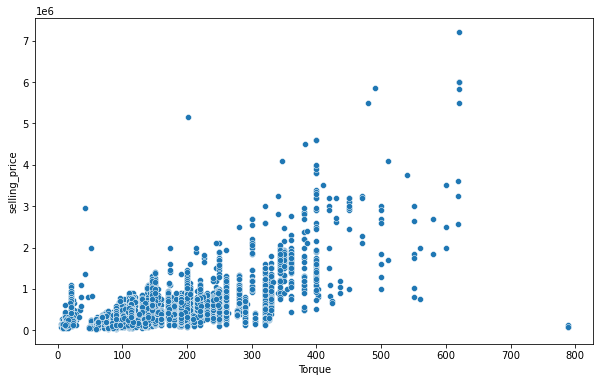

In [212]:
sns.scatterplot(car3['Torque'], car3['selling_price'])

In [213]:
Drop_cols.append('Torque')

So the columns that we are going to drop from dataset are displayed below

In [214]:
Drop_cols

['seller_type', 'seats', 'Mileage', 'Engine', 'Torque']

In [215]:
car5 = car3.drop(Drop_cols, axis = 1)

In [216]:
car5

,year,selling_price,km_driven,fuel,transmission,owner,Brand_Name,Power
0,2014.0,450000.0,145500.0,4.0,1.0,4.0,9.0,74.00
1,2014.0,370000.0,120000.0,4.0,1.0,3.0,16.0,103.52
2,2006.0,158000.0,140000.0,3.0,1.0,2.0,15.0,78.00
3,2010.0,225000.0,127000.0,4.0,1.0,4.0,12.0,90.00
4,2007.0,130000.0,120000.0,3.0,1.0,4.0,9.0,88.20
...,...,...,...,...,...,...,...,...
6748,2013.0,260000.0,50000.0,3.0,1.0,3.0,9.0,67.10
6749,2014.0,475000.0,80000.0,4.0,1.0,3.0,12.0,88.73
6750,2013.0,320000.0,110000.0,3.0,1.0,4.0,12.0,82.85
6751,2007.0,135000.0,119000.0,4.0,1.0,1.0,12.0,110.00


### Summary

- We have finished the feature selection and removal of  multi-collinearity

Now, Let's train the model with the newly modified dataset and compare the scores with previous models

In [217]:
X2 = car5.drop('selling_price', axis = 1)

In [218]:
Y2 = car5['selling_price']

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 1)

MSE : 78309140039.87726
RMSE : 279837.7030349507
MAE : 162658.51463577003
R2 : 0.6628403701085113


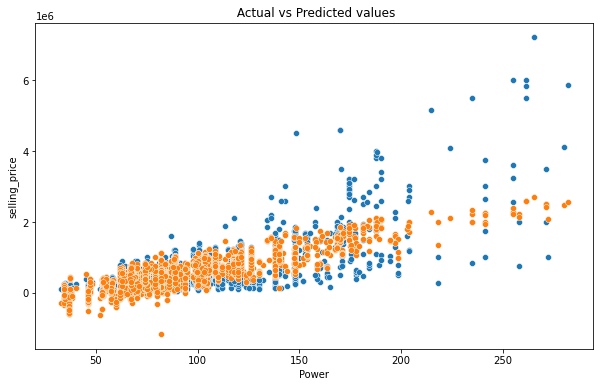

In [220]:
a, LR6, Train_dataset = train_score(X_train, Y_train, 'Power', 'Multiple Linear Regression after Feature selection', Train_dataset)

MSE : 55468534424.04992
RMSE : 235517.58835392722
MAE : 152361.0123886988
R2 : 0.7103297249125511


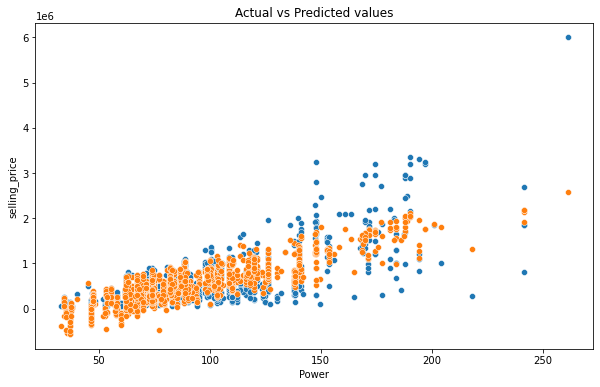

In [221]:
b, Test_dataset = predict_score(X_test, Y_test, LR6, 'Power','Multiple Linear Regression after Feature Selection', Test_dataset)

In [222]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035


In [223]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354


### Summary

So after the Feature Selection and Outlier removal steps, we can observe that -

- Train_score increased from .65 to .66 and also other evaluation metrics also improved.

- Test_score also improved from .63 to .71 along with other evaluation metrics.

- It shows how feature selection and outlier removal improves the score.

### Polynomial Regression

Let's try Polynomial Regression now

In [224]:
from sklearn.preprocessing import PolynomialFeatures

In [225]:
Poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = Poly.fit_transform(X_train)
X_test_poly  = Poly.transform(X_test)

In [226]:
X_train_poly

array([[1.00000e+00, 2.01000e+03, 1.75000e+05, ..., 8.10000e+01,
        6.75000e+02, 5.62500e+03],
       [1.00000e+00, 2.01700e+03, 1.00000e+04, ..., 8.10000e+01,
        6.57000e+02, 5.32900e+03],
       [1.00000e+00, 2.00800e+03, 6.00000e+04, ..., 1.44000e+02,
        9.46800e+02, 6.22521e+03],
       ...,
       [1.00000e+00, 2.01800e+03, 4.00000e+04, ..., 1.69000e+02,
        1.14400e+03, 7.74400e+03],
       [1.00000e+00, 2.01200e+03, 1.20000e+05, ..., 2.89000e+02,
        2.38000e+03, 1.96000e+04],
       [1.00000e+00, 2.01300e+03, 6.70820e+04, ..., 8.10000e+01,
        7.36200e+02, 6.69124e+03]])

In [227]:
def poly_train(X_train, Y_train, X_test, degree, col, dataset):
    poly = PolynomialFeatures(degree = degree, include_bias = True)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    LR = LinearRegression()
    
    LR.fit(X_train_poly, Y_train)
    
    Y_pred = LR.predict(X_train_poly)
    
    a = eval_score(Y_pred, Y_train, 'Polynomial Regression', dataset )
    
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    return LR, X_test_poly, a

MSE : 31740534077.785755
RMSE : 178158.73281370677
MAE : 111123.0334176384
R2 : 0.8633412815314425


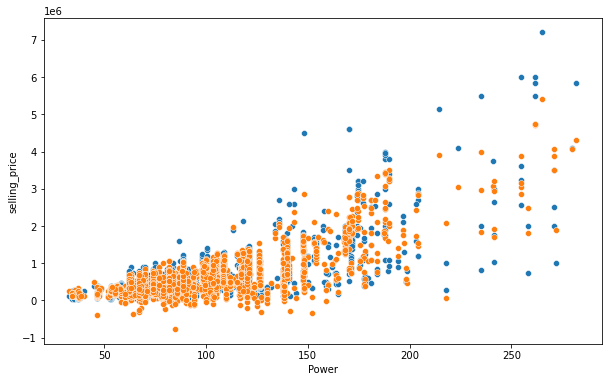

In [228]:
PR1, X_test_poly, Train_dataset = poly_train(X_train, Y_train, X_test, 2, 'Power', Train_dataset)

In [229]:
def poly_test(X_test, X_test_poly, Y_test,  PR, col, dataset):
    Y_pred = PR.predict(X_test_poly)
    a = eval_score(Y_pred, Y_test, 'Polynomial Regression', dataset)
    a['Test_score'][len(a)-1] = a['Train_score'][len(a)-1]
    a = a.drop('Train_score', axis=1)
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred)
    return a

MSE : 27920494774.379128
RMSE : 167094.2691248839
MAE : 108430.86529209086
R2 : 0.8541923365048308


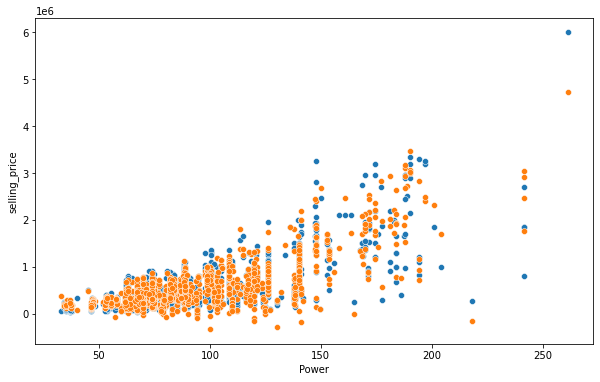

In [230]:
Test_dataset = poly_test(X_test, X_test_poly, Y_test, PR1, 'Power', Test_dataset)

In [231]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814


In [232]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125


### Summary

After converting the Input columns into a Polynomial of degree 2, we observe that -

- Both Train and Test scores drastically improved from .66 to around .85 which is a huge jump.

- Till now Polynomial Regression of degree 2 is performing best in all the terms

- We also tested for degree 3,4,5 etc. but scores were not improving infact they were degrading, so best Polynomial Regression for current dataset is of degree 2

### Regularization

Let's try Ridge Regression now

In [233]:
from sklearn.linear_model import Ridge

Writing a function for Ridge Regression -

- To Train and Test the model with Polynomial dataset 

- Print the Train and Test scores together

- To plot the Graphs too.

In [234]:
def Ridge_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, alpha, col, dataset, dataset2):
    R1 = Ridge(alpha = alpha, normalize = True)
    R1.fit(X_train_poly, Y_train)
    Y_pred = R1.predict(X_train_poly)
    
    print('Train Score-----------')
    a = eval_score(Y_pred, Y_train, 'Ridge Regression', dataset)
    
    
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    Y_pred2 = R1.predict(X_test_poly)
    print(' ')
    
    print('Test Score------------')
    b = eval_score(Y_pred2, Y_test, 'Ridge Regression', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred2)
    
    return R1, a, b
    
    

Train Score-----------
MSE : 44908769094.55554
RMSE : 211916.8919519054
MAE : 126882.64643836314
R2 : 0.8066455083136881
 
Test Score------------
MSE : 36073848989.57964
RMSE : 189931.16908390692
MAE : 120554.78017195668
R2 : 0.8116135234367406


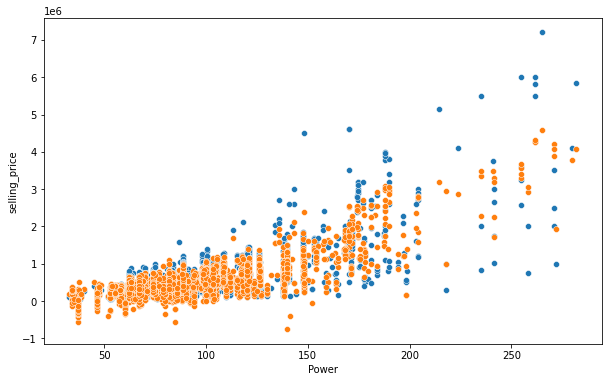

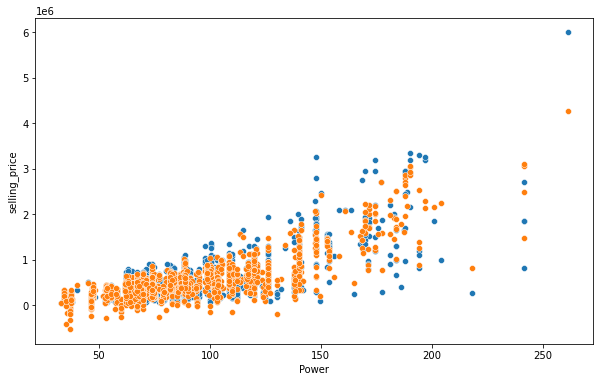

In [235]:
R1, Train_dataset, Test_dataset = Ridge_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 0.005, 'Power', Train_dataset, Test_dataset)

In [236]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952


In [237]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084


### Summary

We can see above that Train and Test scores are less than the Polynomial Regression model but still it is more than all the other models which is close to .80 which is also a great score.

- Regularization means to control the overfitting, so currently value of alpha is 0.005 that we have used.

- If we decrease the value of alpha to 0 then we will get the exact same scores as Polynomial model

- If we increase the value of alpha to more than 0.005 then the scores will decrease.

- So, it's on us how much we want to control the curve and reduce the overfitting.

### Lasso

Let try Lasso Regression now

In [238]:
from sklearn.linear_model import Lasso

Writing a same function as of Ridge we have written earlier

In [239]:
def lasso_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, col, dataset, dataset2):
    L1 = Lasso()
    L1.fit(X_train_poly, Y_train)
    Y_pred = L1.predict(X_train_poly)
    
    print('Train Score----------')
    a = eval_score(Y_pred, Y_train, 'Lasso Regression', dataset)
    
    plt.title('Train - Actual vs Predicted')
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    Y_pred2 = L1.predict(X_test_poly)
    
    print(' ')
    print('Test Score-----------')
     
    b = eval_score(Y_pred2, Y_test, 'Lasso Regression', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    
    plt.title('Test - Actual vs Predicted')
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred2)
    
    return a,b

Train Score----------
MSE : 44100747547.01579
RMSE : 210001.77986630445
MAE : 127101.24342392756
R2 : 0.8101244412425151
 
Test Score-----------
MSE : 35799435670.632545
RMSE : 189207.38799167582
MAE : 121430.7321099355
R2 : 0.8130465770122937


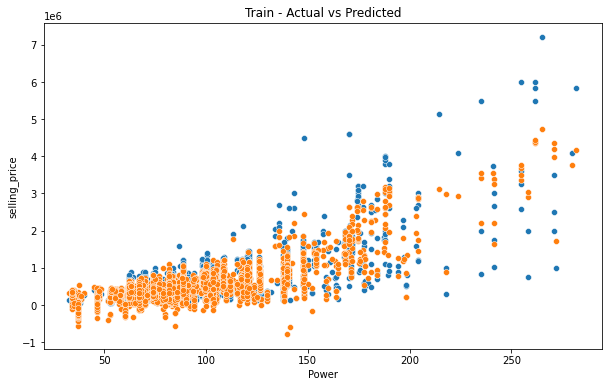

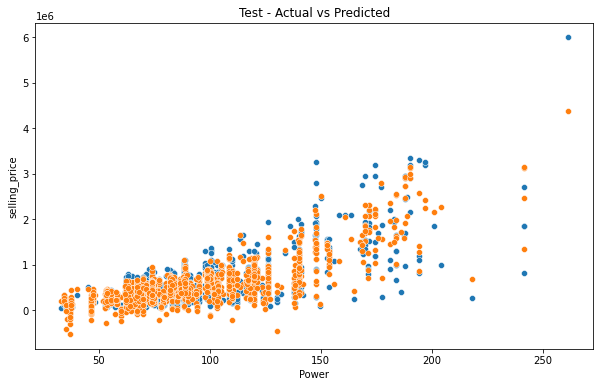

In [240]:
Train_dataset, Test_dataset = lasso_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 'Power', Train_dataset, Test_dataset)

In [241]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866


In [242]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992


### Summary

As we can see above that the scores improved from the average of .80 to .81 when we used Lasso instead of Ridge

- Lasso is performing better than Ridge but still Polynomial Regression is the best model untill now.

### Elastic Net

Let's try Elastic Net Model now

In [243]:
from sklearn.linear_model import ElasticNet

Same function as previous ones for Ridge and Lasso

In [244]:
def elastic_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, alpha, l1, col, dataset, dataset2):
    L1 = ElasticNet(alpha = alpha, l1_ratio = l1)
    L1.fit(X_train_poly, Y_train)
    Y_pred = L1.predict(X_train_poly)
    
    print('Train Score---------')
    a = eval_score(Y_pred, Y_train, 'Elastic Net', dataset)
    
    
    plt.title('Train Data: Actual vs Predicted')
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    Y_pred2 = L1.predict(X_test_poly)
    
    
    print('Test Score----------')
    print(' ')
    b = eval_score(Y_pred2, Y_test, 'Elastic Net', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    
    plt.title('Test Data: Actual vs Predicted')
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred2)
    
    return a,b

Train Score---------
MSE : 44173325063.830574
RMSE : 210174.51097559516
MAE : 127251.6786201501
R2 : 0.8098119590891515
Test Score----------
 
MSE : 35740223183.6811
RMSE : 189050.84814324716
MAE : 121210.8258632244
R2 : 0.8133557991246485


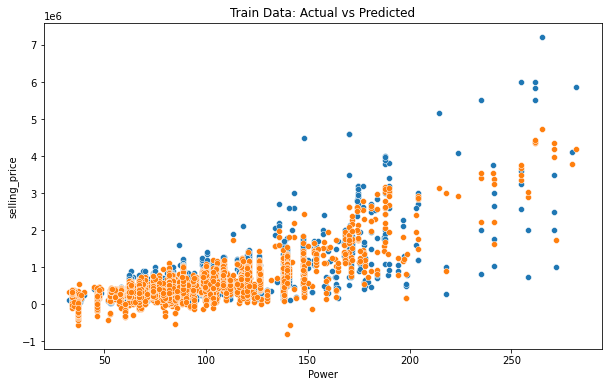

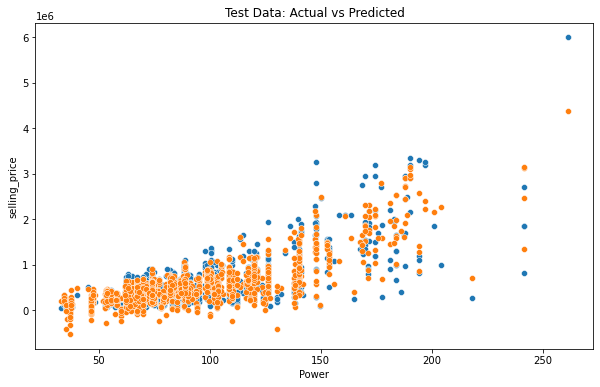

In [245]:
Train_dataset, Test_dataset = elastic_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 0.005, 0.005, 'Power', Train_dataset, Test_dataset)

In [246]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866
6,Elastic Net,0.809812,127251.678620,4.417333e+10,210174.510976


In [247]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992
6,Elastic Net,0.813356,121210.825863,3.574022e+10,189050.848143


### Summary

Elastic Net is the combination of Ridge and Lasso both means it uses L1 and L2 penalty both.

- Elastic Net model is performing better than Lasso, it can improve if we fine tune the alpha and l1_ratio even more

### Cross-Validation

We can also add cross validation step for further analysis of a model's performance

In [248]:
from sklearn.model_selection import cross_val_score

In [249]:
def cross_score(Model, X, Y, Kfold, scoring):
    scores = cross_val_score(Model, X, Y, cv = Kfold, scoring = scoring)
    return scores

In [250]:
import sklearn

Below are the different kind of evaluation scores that can be used as per the requirement, here we will be using r2_score

In [251]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Ensemble Methods

Let's try HistGradientBoostingRegressor model

In [252]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [253]:
def Hist_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, col, dataset, dataset2):
    model = HistGradientBoostingRegressor()
    model.fit(X_train_poly, Y_train)
    
    Y_pred = model.predict(X_train_poly)
    print('Train Score ---------')
    
    a = eval_score(Y_pred, Y_train, 'HistGradientBoostingRegressor', dataset)
    
    plt.title('Train: Actual vs Predicted')
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    Y_pred2 = model.predict(X_test_poly)
    
    print(' ')
    print('Test Score-----------')
    
    b = eval_score(Y_pred2, Y_test, 'HistGradientBoostingRegressor', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    
    plt.title('Test: Actual vs Predicted')
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred2)
    
    return model, a, b
    
    

Train Score ---------
MSE : 10069657712.058231
RMSE : 100347.68413898864
MAE : 58099.7988252734
R2 : 0.9566451366264186
 
Test Score-----------
MSE : 22565687444.162148
RMSE : 150218.79857115803
MAE : 81138.17823444918
R2 : 0.8821564521695077


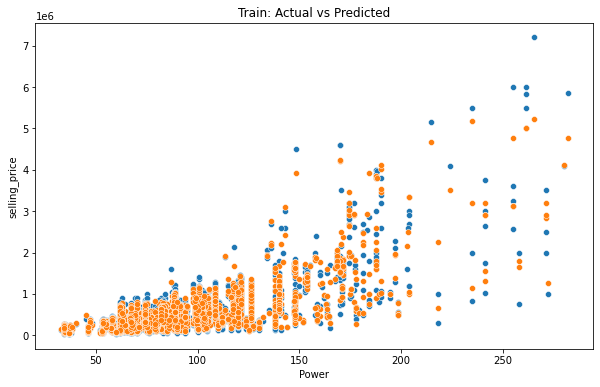

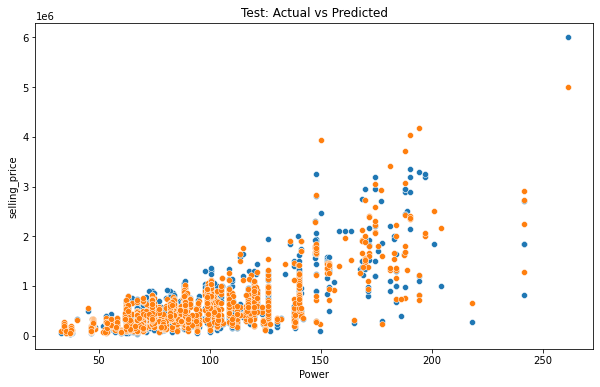

In [254]:
HG1, Train_dataset, Test_dataset = Hist_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 'Power', Train_dataset, Test_dataset)

In [255]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866
6,Elastic Net,0.809812,127251.678620,4.417333e+10,210174.510976
7,HistGradientBoostingRegressor,0.956645,58099.798825,1.006966e+10,100347.684139


In [256]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992
6,Elastic Net,0.813356,121210.825863,3.574022e+10,189050.848143
7,HistGradientBoostingRegressor,0.882156,81138.178234,2.256569e+10,150218.798571


### Cross Validation

Let's also try Cross validation on the complete dataset

In [257]:
X2_poly = Poly.transform(X2)

In [258]:
hg_scores3 = cross_score(HG1, X2_poly, Y2, 10, 'r2')

In [259]:
hg_scores3.mean()

0.9079096752792608

### Summary

As we can see above that HistGradientBoostingRegressor has given the best scores untill now which is around .90

- For train and test data both, we achieved the best scores.

- It is an ensemble method which uses GradientBoosting Method internally

- So far it is the best performing model

### RandomForestRegressor

Let's try Random Forest now

In [260]:
from sklearn.ensemble import RandomForestRegressor

In [261]:
def Random_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, col, dataset, dataset2):
    model = RandomForestRegressor()
    model.fit(X_train_poly, Y_train)
    
    Y_pred = model.predict(X_train_poly)
    print('Train Score ---------')
    
    a = eval_score(Y_pred, Y_train, 'Random Forest Regressor', dataset)
    
    plt.title('Train : Actual vs Predicted')
    sns.scatterplot(X_train[col], Y_train)
    sns.scatterplot(X_train[col], Y_pred)
    
    Y_pred2 = model.predict(X_test_poly)
    
    print(' ')
    print('Test Score-----------')
    
    b = eval_score(Y_pred2, Y_test, 'Random Forest Regressor', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    
    plt.title('Test : Actual vs Predicted')
    sns.scatterplot(X_test[col], Y_test)
    sns.scatterplot(X_test[col], Y_pred2)
    
    return model, a, b
    
    

Train Score ---------
MSE : 3238710320.889494
RMSE : 56909.66807924199
MAE : 31755.16124223875
R2 : 0.9860557481213459
 
Test Score-----------
MSE : 20183136972.698116
RMSE : 142067.36772636464
MAE : 81448.79957635798
R2 : 0.8945987143933943


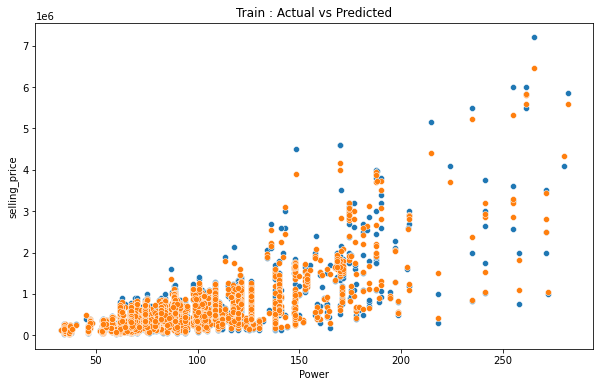

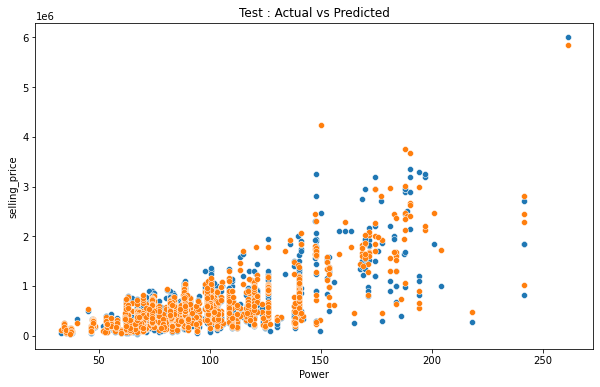

In [262]:
RF1, Train_dataset, Test_dataset = Random_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 'Power', Train_dataset, Test_dataset)

In [263]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866
6,Elastic Net,0.809812,127251.678620,4.417333e+10,210174.510976
7,HistGradientBoostingRegressor,0.956645,58099.798825,1.006966e+10,100347.684139
8,Random Forest Regressor,0.986056,31755.161242,3.238710e+09,56909.668079


In [264]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992
6,Elastic Net,0.813356,121210.825863,3.574022e+10,189050.848143
7,HistGradientBoostingRegressor,0.882156,81138.178234,2.256569e+10,150218.798571
8,Random Forest Regressor,0.894599,81448.799576,2.018314e+10,142067.367726


Let's try cross validation

In [265]:
scores_rf = cross_score(RF1, X2_poly, Y2, 10, 'r2')

In [266]:
scores_rf

array([0.88600599, 0.91737601, 0.9251501 , 0.89531529, 0.87846401,
       0.93824922, 0.89323192, 0.90658658, 0.89985725, 0.90989562])

In [267]:
scores_rf.mean()

0.9050131982442162

### Summary

- We can see above that we are getting the best scores for both train and test dataset till now using Random Forest 

- But for the test dataset it is very low comapared to Train Dataset, so it is a case of Overfitting which may need to handle by tweaking the Parameters of RandomForestRegressor Model

- In the cross validation too Random Forest is performing well but there will be a case of overfitting because it is not performing that much well on test dataset which we may need to handle later

### Neural network

Let's try Neural Network now

In [268]:
import tensorflow as tf

In [269]:
from tensorflow.keras import Model

In [270]:
from tensorflow.keras import Sequential

In [271]:
from tensorflow.keras.optimizers import Adam, SGD

In [272]:
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [273]:
NN1 = Sequential()

In [274]:
NN1.add(Dense(100, input_dim = 7, activation='relu'))
NN1.add(Dense(10))
NN1.add(Dense(1))

2024-06-25 20:15:37.309205: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 20:15:37.310973: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [275]:
NN1.compile(loss='mean_absolute_error', optimizer = SGD(), metrics = ['mae'])

In [276]:
scaler1 = StandardScaler()

In [277]:
X_train_scaled = scaler1.fit_transform(X_train)

In [278]:
X_train_scaled[1]

array([ 0.88688956, -1.02909025, -0.96490441, -0.30227758,  0.68469548,
       -0.6598495 , -0.45123811])

In [279]:
Y_scaled = np.asarray(Y_train)

In [280]:
Y_scaled

array([305000., 400000., 140000., ..., 650000., 535000., 371000.])

In [281]:
X_test_scaled = scaler1.transform(X_test)

In [282]:
NN1.fit(X_train_scaled, Y_scaled, epochs = 10)

Train on 4718 samples
Epoch 1/10
4718/4718 [==============================] - 1s 149us/sample - loss: 479215.0087 - mae: 479215.0312
Epoch 2/10
4718/4718 [==============================] - 0s 33us/sample - loss: 350090.3337 - mae: 350090.4062
Epoch 3/10
4718/4718 [==============================] - 0s 26us/sample - loss: 297181.3576 - mae: 297181.3750
Epoch 4/10
4718/4718 [==============================] - 0s 30us/sample - loss: 311827.8863 - mae: 311827.9375
Epoch 5/10
4718/4718 [==============================] - 0s 28us/sample - loss: 297007.5075 - mae: 297007.4688
Epoch 6/10
4718/4718 [==============================] - 0s 26us/sample - loss: 291504.2141 - mae: 291504.2188
Epoch 7/10
4718/4718 [==============================] - 0s 27us/sample - loss: 290555.1914 - mae: 290555.2500
Epoch 8/10
4718/4718 [==============================] - 0s 26us/sample - loss: 293995.1939 - mae: 293995.2812
Epoch 9/10
4718/4718 [==============================] - 0s 26us/sample - loss: 314613.0380 - mae:

In [283]:
Y_pred_nn = NN1.predict(X_train_scaled)

In [284]:
a = eval_score(Y_pred_nn, Y_train, 'Neural Network', Train_dataset)

MSE : 61205648572.19765
RMSE : 247397.75377354914
MAE : 174985.9491694872
R2 : 0.7364793712539531


In [285]:
Y_pred_nn2 = pd.DataFrame(Y_pred_nn)

In [286]:
Y_train

5308     305000.0
2623     400000.0
5865     140000.0
2979    1850000.0
839      260000.0
          ...    
910      900000.0
5203     325000.0
3987     650000.0
237      535000.0
5168     371000.0
Name: selling_price, Length: 4718, dtype: float64

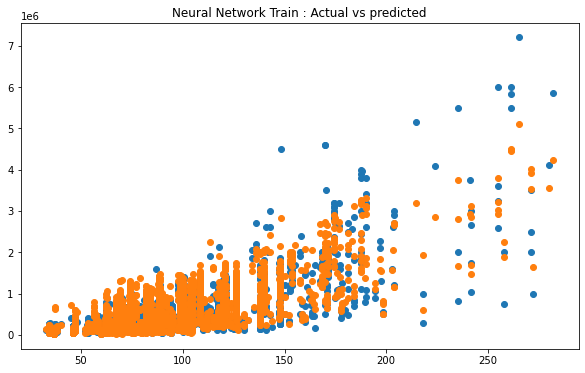

In [287]:
plt.title('Neural Network Train : Actual vs predicted')
plt.scatter(X_train['Power'], Y_scaled)
plt.scatter(X_train['Power'], Y_pred_nn)

So on a normal dataset we are getting the score of .56 but now let's try for Polynomial Dataset

In [288]:
def nn_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, epochs, loss, optimizer, dataset, dataset2):
    nn = Sequential()
    nn.add(Dense(100, input_dim = 36, activation='relu'))
    nn.add(Dense(10))
    nn.add(Dense(1))
    nn.compile(loss=loss, optimizer = optimizer)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)
    
    Y_train_scaled = np.asarray(Y_train)
    Y_test_scaled = np.asarray(Y_test)
    
    nn.fit(X_train_scaled, Y_train_scaled, epochs = epochs, verbose =0)
    
    Y_pred = nn.predict(X_train_scaled)
    
    print('Train Score--------')
    a = eval_score(Y_pred, Y_train_scaled, 'Neural Network', dataset)
    
    plt.title('Train : Actual vs Predicted')
    plt.scatter(X_train['Power'], Y_train_scaled)
    plt.scatter(X_train['Power'], Y_pred)
    
    print(' ')
    print('Test Score--------')
    
    Y_pred2 = nn.predict(X_test_scaled)
    
    b = eval_score(Y_pred2, Y_test_scaled, 'Neural Network', dataset2)
    b['Test_score'][len(b)-1] = b['Train_score'][len(b)-1]
    b = b.drop('Train_score', axis=1)
    
    plt.figure()
    plt.title('Test : Actual vs Predicted')
    plt.scatter(X_test['Power'], Y_test_scaled)
    plt.scatter(X_test['Power'], Y_pred2)
    
    return a,b, nn

Train Score--------
MSE : 51635391776.52861
RMSE : 227234.22228293127
MAE : 116911.14763198601
R2 : 0.7776840663578855
 
Test Score--------
MSE : 36911976098.26295
RMSE : 192124.89713273224
MAE : 113821.33083626495
R2 : 0.8072366183562041


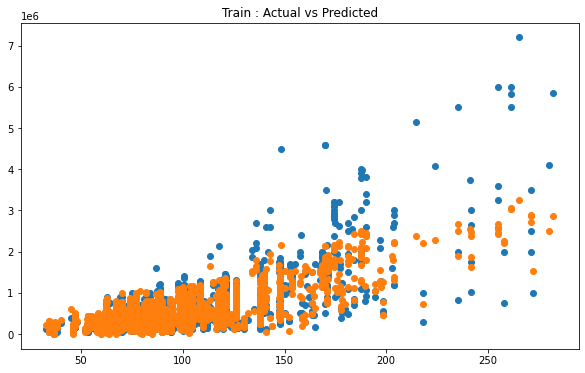

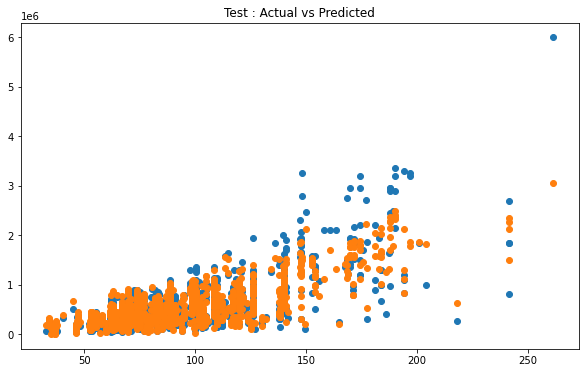

In [289]:
Train_dataset, Test_dataset, Nn1 = nn_score(X_train, X_train_poly, Y_train, X_test, X_test_poly, Y_test, 100, 'mean_absolute_error', Adam(), Train_dataset, Test_dataset)

In [290]:
Train_dataset

,Desc,Train_score,MAE,MSE,RMSE
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866
6,Elastic Net,0.809812,127251.678620,4.417333e+10,210174.510976
7,HistGradientBoostingRegressor,0.956645,58099.798825,1.006966e+10,100347.684139
8,Random Forest Regressor,0.986056,31755.161242,3.238710e+09,56909.668079
9,Neural Network,0.777684,116911.147632,5.163539e+10,227234.222283


In [291]:
Test_dataset

,Desc,Test_score,MAE,MSE,RMSE
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992
6,Elastic Net,0.813356,121210.825863,3.574022e+10,189050.848143
7,HistGradientBoostingRegressor,0.882156,81138.178234,2.256569e+10,150218.798571
8,Random Forest Regressor,0.894599,81448.799576,2.018314e+10,142067.367726
9,Neural Network,0.807237,113821.330836,3.691198e+10,192124.897133


### Summary

So as we can see above for neural network we are getting an averge score of .78 after training the neural network for 100 epochs

 - After training on 100 epochs also we are not getting the best scores 
 
 - We can definitely try to fine tune the neural network by adjusting no of layers, nodes in each layers, Loss function, Optimizer, no. of epochs etc. 
 
 - But using neural network here seems like using Sword instead of Knife to cut a fruit, So we can use any other previous best performing model which does not takes so much of time for training and Fine tuning.

In [292]:
Train_dataset.sort_values(by='Train_score', ascending=False)

,Desc,Train_score,MAE,MSE,RMSE
8,Random Forest Regressor,0.986056,31755.161242,3.238710e+09,56909.668079
7,HistGradientBoostingRegressor,0.956645,58099.798825,1.006966e+10,100347.684139
3,Polynomial Regression,0.863341,111123.033418,3.174053e+10,178158.732814
5,Lasso Regression,0.810124,127101.243424,4.410075e+10,210001.779866
6,Elastic Net,0.809812,127251.678620,4.417333e+10,210174.510976
4,Ridge Regression,0.806646,126882.646438,4.490877e+10,211916.891952
9,Neural Network,0.777684,116911.147632,5.163539e+10,227234.222283
2,Multiple Linear Regression after Feature selec...,0.662840,162658.514636,7.830914e+10,279837.703035
0,Linear Regression Model before Feature Selection,0.654311,175591.710607,9.894202e+10,314550.500734
1,Simple Linear Regression using Power column,0.490767,223821.408652,1.457511e+11,381773.688138


In [293]:
Test_dataset.sort_values(by='Test_score', ascending=False)

,Desc,Test_score,MAE,MSE,RMSE
8,Random Forest Regressor,0.894599,81448.799576,2.018314e+10,142067.367726
7,HistGradientBoostingRegressor,0.882156,81138.178234,2.256569e+10,150218.798571
3,Polynomial Regression,0.854192,108430.865292,2.792049e+10,167094.269125
6,Elastic Net,0.813356,121210.825863,3.574022e+10,189050.848143
5,Lasso Regression,0.813047,121430.732110,3.579944e+10,189207.387992
4,Ridge Regression,0.811614,120554.780172,3.607385e+10,189931.169084
9,Neural Network,0.807237,113821.330836,3.691198e+10,192124.897133
2,Multiple Linear Regression after Feature Selec...,0.710330,152361.012389,5.546853e+10,235517.588354
0,Linear Regression before Feature Selection,0.634632,172869.951198,8.859869e+10,297655.319155
1,Simple Linear Regression using Power column,0.448470,224364.812367,1.337416e+11,365707.002603


# Final Summary

- HistGradientBoostingRegressor and RandomForestRegressor are the best performing model.

- We can use HistGradient one or Random Forest if we can handle the Overfitting

- As Random Forest model has a big difference between Train and Test Score which means there is overfitting.

- So, if we can handle the overiftting by handling the Overfitting then we may use it.

### How to Create the best Regression Model ?

1. Converting the dataset into a polynomial of degree 2 was a huge factor in getting good scores, so in any Regression challenge we can find the degree of curve of the Target column first then convert it into a polynomial of that degree then train the model with it, it will greatly impact the scores.

2. Handling Null Values, Categorical values in a correct way is very important, we should always try to understand the data before handling theses two values.

3. Feature Engineering: Extracting Data from individual columns is also very important such that all the information that can be used should be in the separate columns otherwise together they don't make that much sense.

4. Feature Selection: Removing columns which don't effect or have very less correlation with Target Variable is very important and also removing those columns which are adding to the multi-collinearity.

5. Outlier Detection and Handling: Finding out the unusual data points or erros which should not belong to General population and removal of them is also very important.

6. Then Trying different model, Hypertuning them, cross_validating them and comparing the results will surely give us our best model 

